# Musical Ambiguous Figures Visualizations and Analysis

**Author:** Sarah Gates

**Contact:** sarahgates22@gmail.com

[Github](https://github.com/Saz2049) <br>
[LinkedIn](https://www.linkedin.com/in/sarah-gates-/)

**Date:** Summer 2022


## Introduction

This notebook includes the exploratory data analysis for both dependent variables (ease of hearing and ease of change ratings), as well as the visualizations for the repeated-measures ANOVAs completed in R. The end of the notebook contains the analysis and visualizations for relevant biographical information, as well as analysis and visualizations for familiarity ratings.

## Table of Contents

1. [Data Loading](#1.-Data-Loading)
<br>

2. [Exploratory Analysis: DV1](#2.-Exploratory-Analysis:-DV1)
    * [a. Outliers](#a.-Outliers)
    * [b. Data Summaries and Pivot Tables](#b.-Data-Summaries-and-Pivot-Tables) 
        * [i. Main Effects](#i.-Main-Effects)
        * [ii. Two-Way Interactions](#ii.-Two-Way-Interactions)
        * [iii. Effects of Order](#iii.-Effects-of-Order)
        
        <br>
3. [Exploratory Analysis: DV2](#3.-Exploratory-Analysis:-DV2-(ease-of-change))
    * [a. Outliers](#O2)
    * [b. Data Summaries and Pivot Tables](#DS2)
        * [i. Main Effects](#DS1i) 
        * [ii. Effects of Order](#DS1ii)
        
        <br>
4. [Visualizations for RM ANOVA: DV1](#4.-Visualizations-for-RM-ANOVA:-DV1)
    * [a. Main Effects](#RM1a)
    * [b. Interaction Effects](#RM1b)
    
    <br>
    
5. [Visualizations for RM ANOVA: DV2](#)
    * [a. Main Effects](#RM2a)

    <br>
    
6. [Biographical and Summary Statistics](#6.-Biographical-and-Summary-Statistics)
<br>

7. [Familiarity Analysis](#7.-Familiarity-Analysis)

Loading the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px
from pylab import rcParams

##  1. Data Loading

First I will load and examine the data for DV1, DV2, and both DV2 combined.

**DV1: Ease of Hearing**

In [2]:
df1 = pd.read_csv('data/amb_DV1_fin.csv') # loading the dataset without the outlier

In [3]:
df1.head(5)

,Unnamed: 0,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
1,1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
2,2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,Intermediate,2,3,2,2,1,6,2,1,1
3,3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,...,Intermediate,1,3,1,1,1,3,1,2,2
4,4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,...,Expert,2,1,2,1,1,4,1,1,1


Resetting the index:

In [4]:
df_DV1_long = df1.set_index(keys='Unnamed: 0')

df_DV1_long.index.names = ['Index']

df_DV1_long

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,244,Recapitulation,Schema,Prinner,7.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Schema,Prinner,6.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
17,701,Recapitulation,Schema,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,I have heard this before,...,Intermediate,2,3,1,2,2,6,1,2,2


In [5]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,591.210526,4.690789,6.068421,4.505263,1.631579,3.105263,1.473684,1.473684,1.421053,3.526316,1.526316,1.421053,1.526316
std,255.110358,2.208145,0.942423,2.042148,0.483438,1.777829,0.500406,0.500406,0.494814,1.605116,0.500406,0.494814,0.500406
min,148.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.000000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,540.000000,5.250000,6.100000,4.900000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,862.000000,6.525000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


Checking one of the indecies:

In [6]:
df_DV1_long.loc[18, :]

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
18,540,Exposition,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Soprano,Prinner,5.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Romanesca,4.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Exposition,Schema,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Romanesca,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Bass,Prinner,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2
18,540,Recapitulation,Soprano,Romanesca,6.3,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,3,2,2,2,4,2,2,2


In [7]:
df_DV1_long.Excerpt_Analysis.value_counts()

No, not at all    180
Yes, somewhat      48
Name: Excerpt_Analysis, dtype: int64

Double checking for null values:

In [8]:
# Checking nulls
df_DV1_long.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
Mod_Type                0
DV                      0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
dtype: int64

Checking for duplicates:

In [9]:
# checking duplicate rows

df_DV1_long.duplicated().sum()

0

In [10]:
# checking duplicate columns

df_DV1_long.T.duplicated().sum()

0

**DV2: Ease of Change**

Loading in the data for the second dependent variable, ease of change ratings:

In [11]:
df2 = pd.read_csv('data/amb_DV2_fin.csv')

df_DV2_long = df2.set_index(keys='Unnamed: 0')

df_DV2_long.index.names = ['Index']

df_DV2_long.head(5)

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,0.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,0.0,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,0.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,0.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,0.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


In [12]:
df_DV2_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'DV2', 'Education_Level',
       'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

Double checking for nulls:

In [13]:
df_DV2_long.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
DV2                     0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
dtype: int64

Double checking for duplicates:

In [14]:
df_DV2_long.duplicated().sum()

0

In [15]:
df_DV2_long.T.duplicated().sum()

0

There are no nulls or duplicates! 

**Both DVs Combined**

Finally, loading the combined dataset:

In [16]:
df3 = pd.read_csv('data/amb_both_DVs_fin.csv')

df_Both_DVs = df3.set_index(keys='Unnamed: 0') # resetting index

df_Both_DVs.drop(columns="level_0", inplace=True)

df_Both_DVs.index.names = ['Index']

df_Both_DVs.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
Index,,,,,,,,,,,,,,,,,,,,,
0,148,Exposition,Bass,Romanesca,7.0,0.0,Professor,10 + years,10 + years,Somewhat familiar,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
1,148,Exposition,Bass,Prinner,7.0,0.0,Professor,10 + years,10 + years,Somewhat familiar,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
2,148,Exposition,Schema,Romanesca,0.0,4.0,Professor,10 + years,10 + years,Somewhat familiar,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
3,148,Exposition,Schema,Prinner,4.0,4.0,Professor,10 + years,10 + years,Somewhat familiar,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0
4,148,Exposition,Soprano,Romanesca,5.5,2.1,Professor,10 + years,10 + years,Somewhat familiar,...,1,1,4,1,1,1,Medium,2.0,2.0,1.0


In [17]:
df_Both_DVs.Random_IDs.value_counts() # each participant has 12 rows! 

148    12
686    12
913    12
895    12
883    12
862    12
834    12
719    12
701    12
540    12
244    12
495    12
475    12
473    12
392    12
381    12
326    12
268    12
998    12
Name: Random_IDs, dtype: int64

Checking nulls:

In [18]:
df_Both_DVs.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
Mod_Type                0
DV                      0
DV2                     0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
Familiarity_Cat         0
Familiarity_Numeric     0
Expertise_Numeric       0
Analysis_Numeric        0
dtype: int64

Checking duplicates:

In [19]:
df_Both_DVs.duplicated().sum()

0

In [20]:
df_Both_DVs.T.duplicated().sum()

0

## 2. Exploratory Analysis: DV1

In this section, I perform EDA on the DV1 data. First, I examine the outliers as flagged in the R analysis. I then examine potential main effects, interactions and effect of order for a repeated-measures ANOVA to be completed in R.

First, I will create visualizations for the DV across all of the levels of IVs: Feature, Expertise Group and Sonata Section by Modulation Type in order to examine potential effects on the DV.

<AxesSubplot:xlabel='Feature', ylabel='DV'>

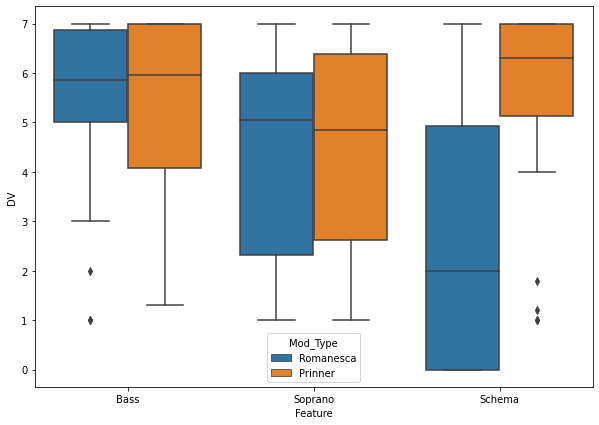

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type')

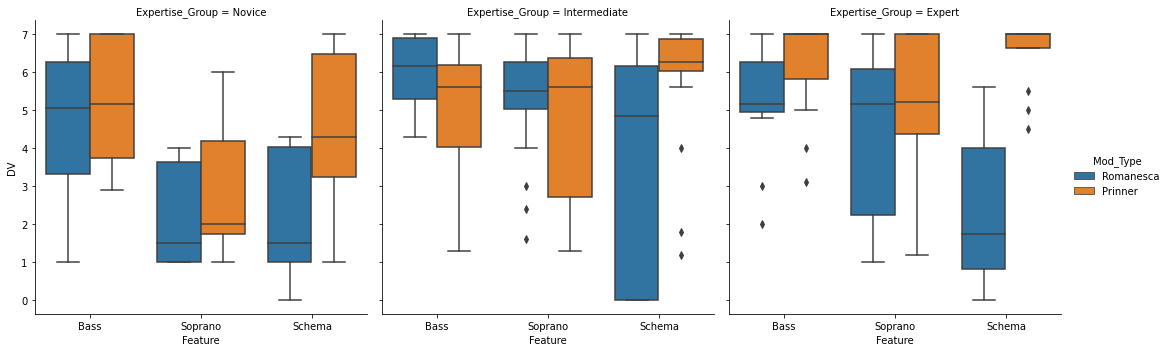

In [22]:
sns.catplot(data=df_DV1_long, x='Feature', y="DV", hue="Mod_Type", kind='box', col='Expertise_Group')

<Figure size 720x504 with 0 Axes>

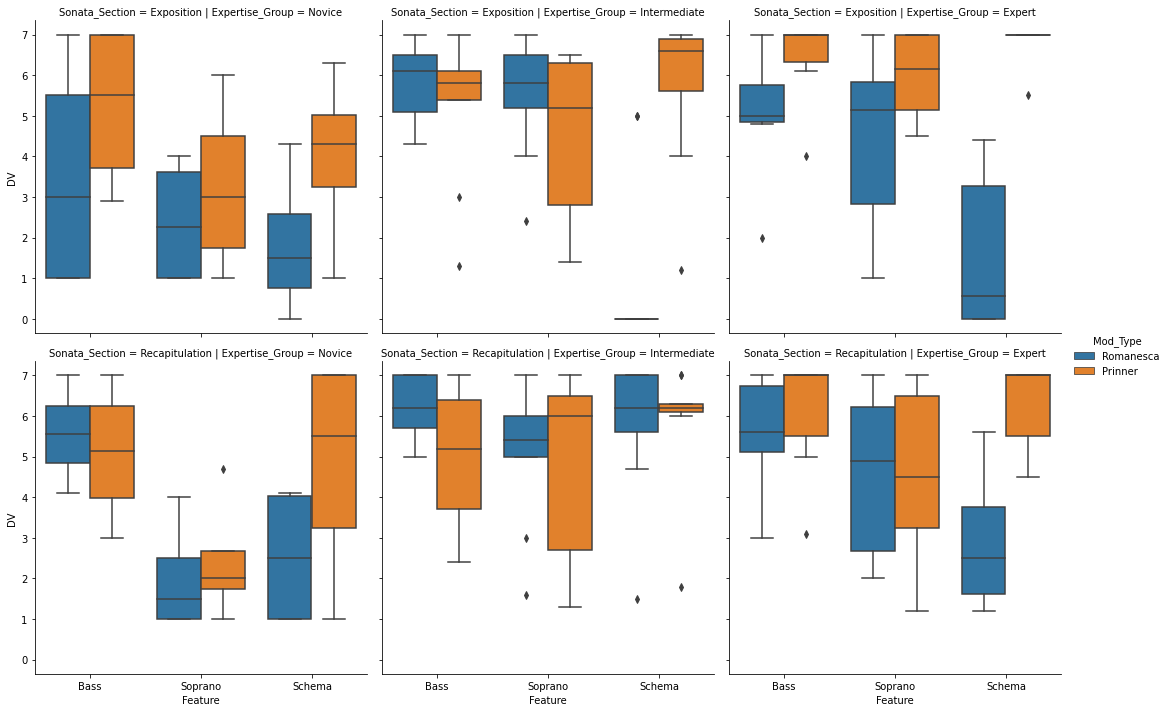

In [23]:
plt.figure(figsize=(10,7))
sns.catplot(data=df_DV1_long, x='Feature', y='DV', hue='Mod_Type', kind='box', col='Expertise_Group', row="Sonata_Section")


<AxesSubplot:xlabel='Feature', ylabel='DV2'>

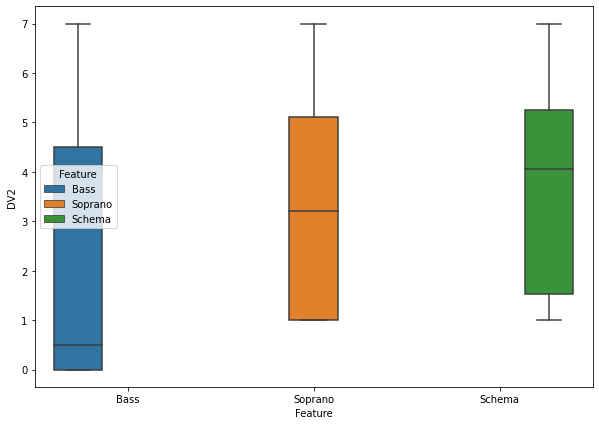

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV2_long, x='Feature', y='DV2', hue='Feature')


<AxesSubplot:xlabel='Sonata_Section', ylabel='DV2'>

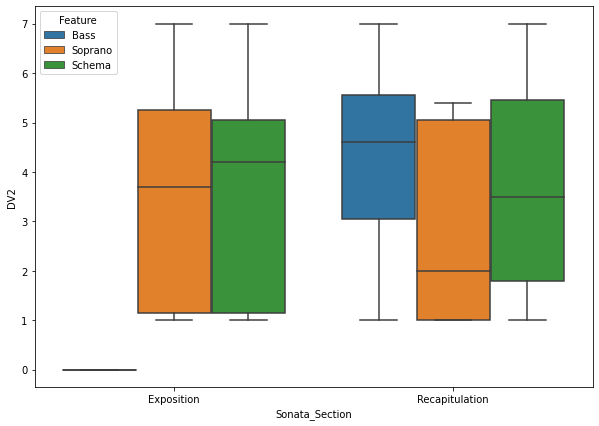

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_DV2_long, x='Sonata_Section', y='DV2', hue='Feature')


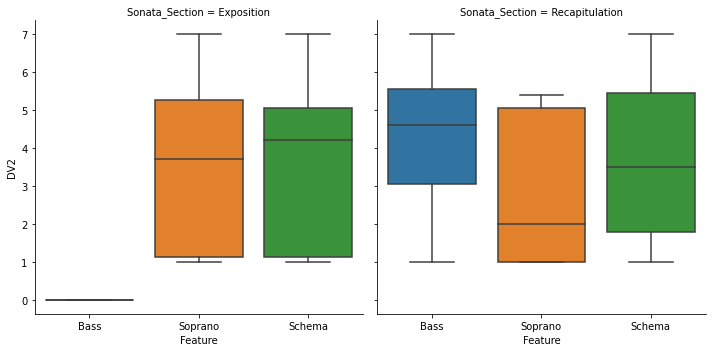

In [26]:
sns.catplot(data=df_DV2_long, x='Feature', y='DV2', kind='box', col='Sonata_Section')

**Visualizing DV1 Distributions**

In [27]:
df_DV1_long.head()

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1


### a. Outliers

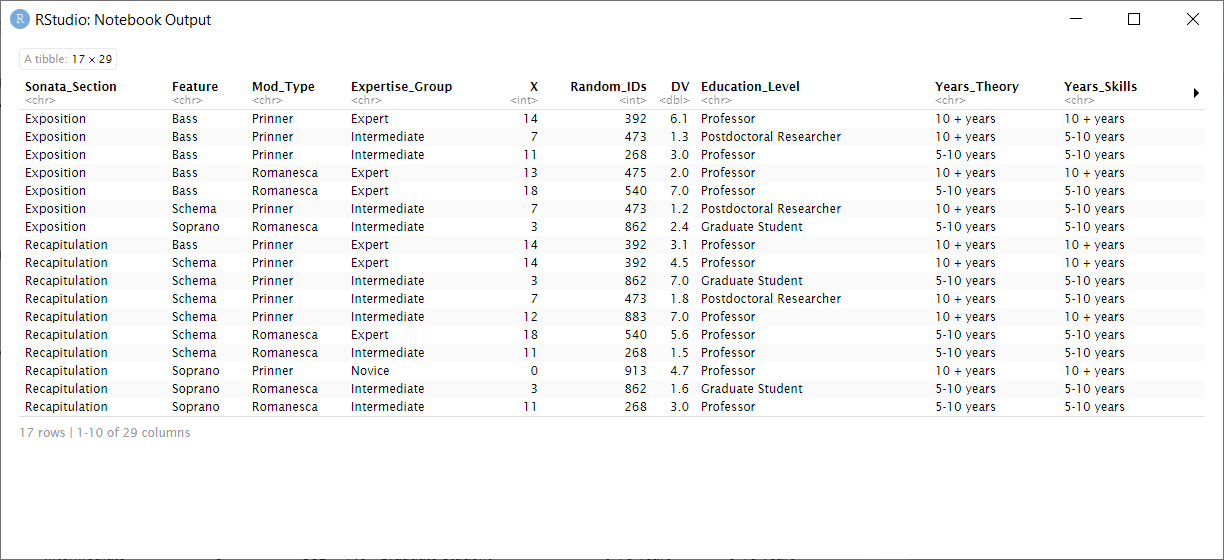

The participants containing outliers occured at index 14, 7, 11, 13, 18, 3, 12 and 0.

In [28]:
outliers = df_DV1_long.loc[[14, 7, 11, 13, 18, 3, 12, 0], :]

outliers

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
14,392,Exposition,Bass,Romanesca,5.0,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Bass,Prinner,6.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Romanesca,5.3,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Soprano,Prinner,5.1,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
14,392,Exposition,Schema,Romanesca,4.4,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,1,1,1,2,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,913,Recapitulation,Bass,Prinner,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Romanesca,1.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
0,913,Recapitulation,Soprano,Prinner,4.7,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2


### b. Data Summaries and Pivot Tables

Here I will examine the data summaries and pivot tables for potential main effects, interactions and effect of survey block order on the DV. 

In [29]:
df_DV1_long.describe()

,Random_IDs,DV,Solfege_Hearing,Schema_Hearing,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,591.210526,4.690789,6.068421,4.505263,1.631579,3.105263,1.473684,1.473684,1.421053,3.526316,1.526316,1.421053,1.526316
std,255.110358,2.208145,0.942423,2.042148,0.483438,1.777829,0.500406,0.500406,0.494814,1.605116,0.500406,0.494814,0.500406
min,148.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,381.000000,3.000000,5.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,540.000000,5.250000,6.100000,4.900000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,862.000000,6.525000,7.000000,6.700000,2.000000,5.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.000000,7.000000,2.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,2.000000


##### i. Main Effects

Sonata Section

In [30]:
# No main effect of sonata section

Table_Sonata_Section_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section'], values='DV',aggfunc=['mean','std'])

Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.476316,2.380128
Recapitulation,4.905263,2.009264


In [31]:
Plot_T1 = Table_Sonata_Section_DV1.reset_index(col_level=1)

Plot_T1.droplevel(0, axis=1)

Plot_T1.columns = ["Sonata Section", 'DV (Mean)', 'std']

Plot_T1

,Sonata Section,DV (Mean),std
0,Exposition,4.476316,2.380128
1,Recapitulation,4.905263,2.009264


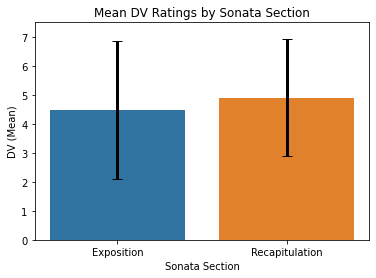

In [32]:
ax1 = sns.barplot(data=Plot_T1, x='Sonata Section', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 8

ax1.errorbar(data=Plot_T1, x='Sonata Section', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Sonata Section")
plt.show()

Feature

In [33]:
#may be a main effect of feature, soprano interpretations are far more difficult

Table_Feature_DV1 =  pd.pivot_table(data=df_DV1_long, index=['Feature'], values='DV',aggfunc=['mean','std'])

Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Schema,4.242105,2.628727
Soprano,4.382895,2.081435


In [34]:
Plot_T2 = Table_Feature_DV1.reset_index(col_level=1)

Plot_T2.droplevel(0, axis=1)

Plot_T2.columns = ["Feature", 'DV (Mean)', 'std']

Plot_T2

,Feature,DV (Mean),std
0,Bass,5.447368,1.623287
1,Schema,4.242105,2.628727
2,Soprano,4.382895,2.081435


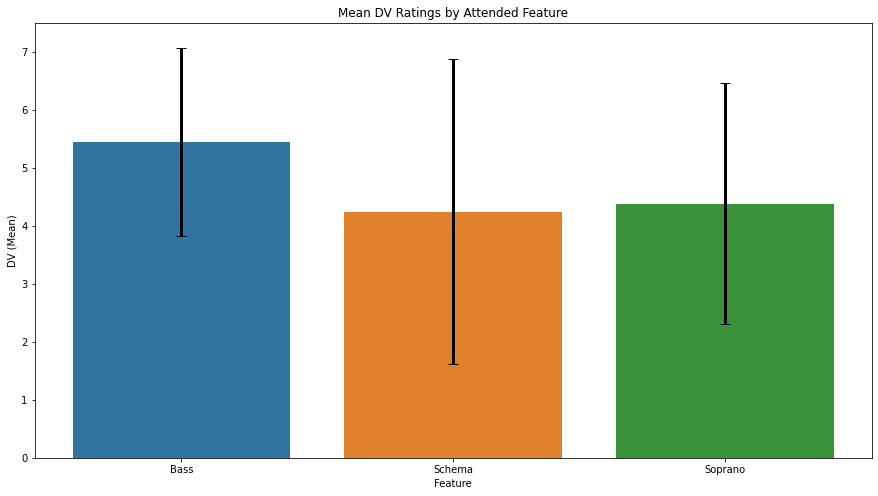

In [35]:
ax2 = sns.barplot(data=Plot_T2, x='Feature', y='DV (Mean)')

plt.ylim(top=7.5)
rcParams['figure.figsize'] = 15, 5

ax2.errorbar(data=Plot_T2, x='Feature', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Attended Feature")
plt.show()

Modulation Type

In [36]:
# Effect of mod type? Prinner easier to hear than Romanesca

Table_Schema_DV1 = pd.pivot_table(data=df_DV1_long, index=['Mod_Type'], values='DV',aggfunc=['mean','std'])

Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.182456,1.949506
Romanesca,4.199123,2.346622


In [37]:
Plot_T3 = Table_Schema_DV1.reset_index(col_level=1)

Plot_T3.droplevel(0, axis=1)

Plot_T3.columns = ["Modulation Type", 'DV (Mean)', 'std']

Plot_T3

,Modulation Type,DV (Mean),std
0,Prinner,5.182456,1.949506
1,Romanesca,4.199123,2.346622


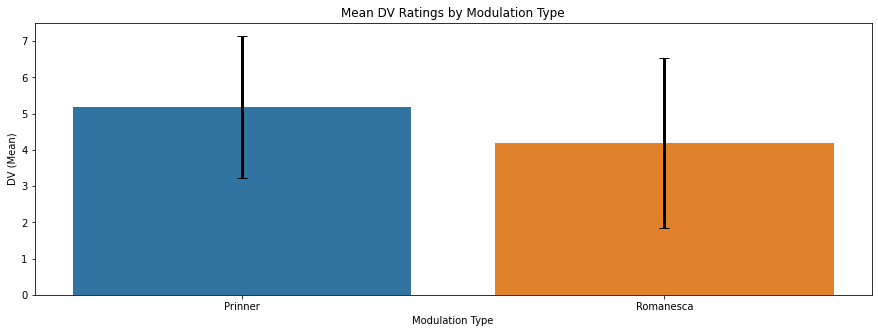

In [38]:

ax3 = sns.barplot(data=Plot_T3, x='Modulation Type', y='DV (Mean)')

plt.ylim(top=7.5)


ax3.errorbar(data=Plot_T3, x='Modulation Type', y='DV (Mean)', yerr='std', ls='', lw=3, color='black', capsize=5)
plt.title(label="Mean DV Ratings by Modulation Type")
plt.show()

Between Subject Factor: Expertise Group

In [39]:
Expertise_Table_DV1 = pd.pivot_table(data=df_DV1_long, index=['Expertise_Group'], values='DV',aggfunc=['mean','std'])

Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,4.986111,2.148455
Intermediate,5.005556,2.095114
Novice,3.539583,2.206541


##### ii. Two-Way Interactions

Sonata Section by Attended Feature

In [40]:
#Probably no two way interaction of Sonata_Section and Feature

Table_Sect_Feat_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature'], values="DV", aggfunc=['mean','std'])

Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.300000  1.793080
               Schema   3.534211  2.887932
               Soprano  4.594737  2.030570
Recapitulation Bass     5.594737  1.442773
               Schema   4.950000  2.153533
               Soprano  4.171053  2.136922

In [41]:
Plot_T4 = Table_Sect_Feat_DV1.reset_index(col_level=1)

Plot_T4.droplevel(0, axis=1)

Plot_T4.columns = ["Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T4

,Sonata Section,Feature,DV (Mean),std
0,Exposition,Bass,5.300000,1.793080
1,Exposition,Schema,3.534211,2.887932
2,Exposition,Soprano,4.594737,2.030570
3,Recapitulation,Bass,5.594737,1.442773
4,Recapitulation,Schema,4.950000,2.153533
5,Recapitulation,Soprano,4.171053,2.136922


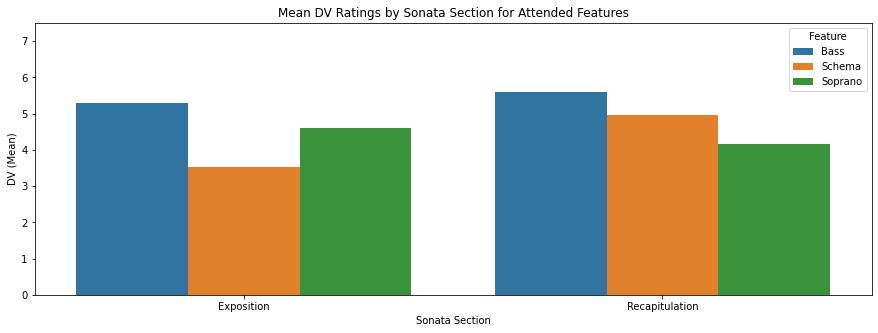

In [42]:
sd= Plot_T4.iloc[:, 3]

ax4 = sns.barplot(data=Plot_T4, x='Sonata Section', y='DV (Mean)', hue='Feature')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Attended Features")
plt.show()

In [43]:
try_this = Plot_T4.groupby(['Feature'])

# lvls = df_DV1_long.Feature.unique()

# ax4.errorbar(data=try_this, x='Sonata Section', y='DV (Mean)', yerr=sd, ls='', lw=3, color='black', capsize=5)


# for i in lvls:
#     ax4.errorbar(data=Plot_T4, x=(Plot_T4[Plot_T4['Feature']==i]["Sonata Section"]),
#                 y=(Plot_T4[Plot_T4['Feature']==i]["DV (Mean)"]), 
#                 yerr=(Plot_T4[Plot_T4['Feature']==i]["std"]), label=i, ls='', lw=3, color='black', capsize=5)

Sonata Section and Modulation Type

In [44]:
# No interaction of Sonata Section and Modulation Type

Table_Sect_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Mod_Type'], values="DV", aggfunc=('mean', 'std'))

Table_Sect_Mod_DV1

mean       std
Sonata_Section Mod_Type                     
Exposition     Prinner    5.300000  1.891050
               Romanesca  3.652632  2.544399
Recapitulation Prinner    5.064912  2.016139
               Romanesca  4.745614  2.007403

In [45]:
Plot_T5 = Table_Sect_Mod_DV1.reset_index(col_level=1)


Plot_T5.columns = ["Sonata Section", "Modulation Type", 'DV (Mean)', 'std']

Plot_T5

,Sonata Section,Modulation Type,DV (Mean),std
0,Exposition,Prinner,5.300000,1.891050
1,Exposition,Romanesca,3.652632,2.544399
2,Recapitulation,Prinner,5.064912,2.016139
3,Recapitulation,Romanesca,4.745614,2.007403


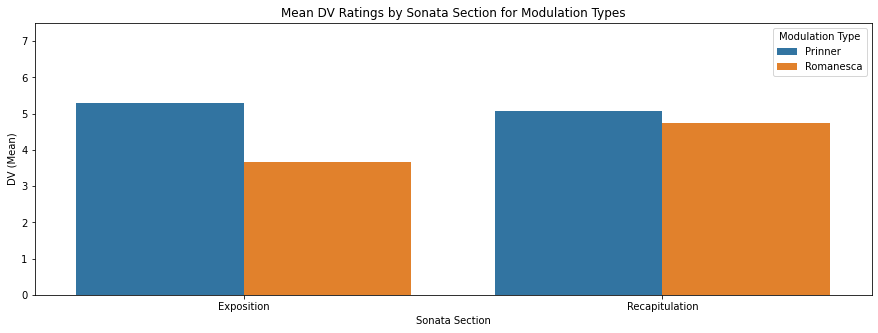

In [46]:
ax5 = sns.barplot(data=Plot_T5, x='Sonata Section', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Sonata Section for Modulation Types")
plt.show()

Feature and Modulation Type

In [47]:
# May be a two-way interaction between feature and modulation type, bass and schema attending features have opposite trend

Table_Feat_Mod_DV1 = pd.pivot_table(data=df_DV1_long, index=['Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.434211  1.683991
        Romanesca  5.460526  1.582769
Schema  Prinner    5.705263  1.815838
        Romanesca  2.778947  2.512472
Soprano Prinner    4.407895  2.124170
        Romanesca  4.357895  2.066023

In [48]:
Plot_T6 = Table_Feat_Mod_DV1.reset_index(col_level=1)


Plot_T6.columns = ["Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T6

,Feature,Modulation Type,DV (Mean),std
0,Bass,Prinner,5.434211,1.683991
1,Bass,Romanesca,5.460526,1.582769
2,Schema,Prinner,5.705263,1.815838
3,Schema,Romanesca,2.778947,2.512472
4,Soprano,Prinner,4.407895,2.124170
5,Soprano,Romanesca,4.357895,2.066023


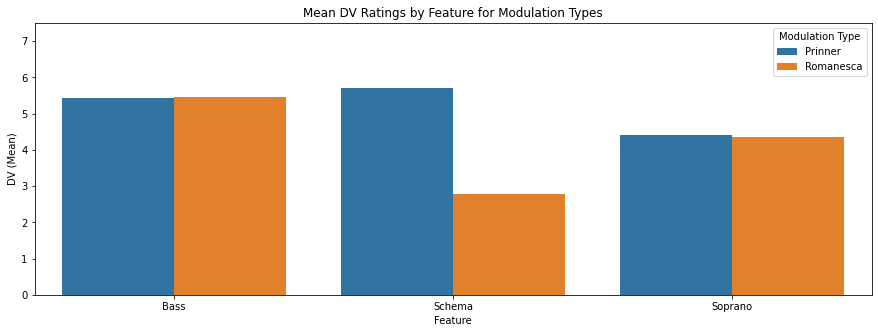

In [49]:
ax6 = sns.barplot(data=Plot_T6, x='Feature', y='DV (Mean)', hue='Modulation Type')

plt.ylim(top=7.5)

plt.title(label="Mean DV Ratings by Feature for Modulation Types")
plt.show()

##### Three Way Interaction

In [50]:
#the interaction has flipped, WHAT

Table_All_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_All_DV1

mean       std
                                        DV        DV
Sonata_Section Feature Mod_Type                     
Exposition     Bass    Prinner    5.542105  1.705324
                       Romanesca  5.057895  1.891300
               Schema  Prinner    5.657895  1.899507
                       Romanesca  1.410526  2.003579
               Soprano Prinner    4.700000  2.008039
                       Romanesca  4.489474  2.102352
Recapitulation Bass    Prinner    5.326316  1.701908
                       Romanesca  5.863158  1.109159
               Schema  Prinner    5.752632  1.779004
                       Romanesca  4.147368  2.237898
               Soprano Prinner    4.115789  2.250003
                       Romanesca  4.226316  2.077884

In [51]:
Plot_T7 = Table_All_DV1.reset_index(col_level=1)


Plot_T7.columns = ["Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T7

,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,Exposition,Bass,Prinner,5.542105,1.705324
1,Exposition,Bass,Romanesca,5.057895,1.891300
2,Exposition,Schema,Prinner,5.657895,1.899507
3,Exposition,Schema,Romanesca,1.410526,2.003579
4,Exposition,Soprano,Prinner,4.700000,2.008039
5,Exposition,Soprano,Romanesca,4.489474,2.102352
6,Recapitulation,Bass,Prinner,5.326316,1.701908
7,Recapitulation,Bass,Romanesca,5.863158,1.109159
8,Recapitulation,Schema,Prinner,5.752632,1.779004
9,Recapitulation,Schema,Romanesca,4.147368,2.237898


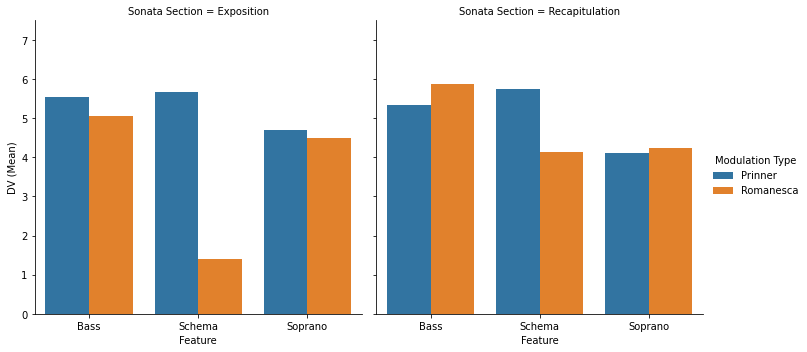

In [52]:
ax7 = sns.catplot(data=Plot_T7, x='Feature', y='DV (Mean)', hue='Modulation Type', col='Sonata Section', kind='bar')

plt.ylim(top=7.5)

plt.show()

#### iii. Effects of Order

In [53]:
df_DV1_long.shape

(228, 26)

In [54]:
(df_DV1_long.Sonata_Order.value_counts())/12

2    12.0
1     7.0
Name: Sonata_Order, dtype: float64

In [55]:
#Seems to be an effect of order! Order 1 = EXPO then RECAP, Order 2 = RECAP then EXPO

Table_OrderAll_DV1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section','Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_OrderAll_DV1


mean       std
                                                     DV        DV
Sonata_Order Sonata_Section Feature Mod_Type                     
1            Exposition     Bass    Prinner    5.914286  1.030257
                                    Romanesca  4.571429  1.796955
                            Schema  Prinner    5.742857  1.463850
                                    Romanesca  2.485714  2.277007
                            Soprano Prinner    3.928571  1.817245
                                    Romanesca  4.214286  1.872101
             Recapitulation Bass    Prinner    4.757143  1.703777
                                    Romanesca  5.842857  0.888552
                            Schema  Prinner    5.971429  1.247283
                                    Romanesca  4.557143  2.087947
                            Soprano Prinner    3.657143  2.355035
                                    Romanesca  4.042857  2.160137
2            Exposition     Bass    Prinner    5.325000  2.010032
                                    Romanesca  5.341667  1.963049
                            Schema  Prinner    5.608333  2.174421
                                    Romanesca  0.783333  1.605011
                            Soprano Prinner    5.150000  2.048725
                                    Romanesca  4.650000  2.290097
             Recapitulation Bass    Prinner    5.658333  1.682238
                                    Romanesca  5.875000  1.257794
                            Schema  Prinner    5.625000  2.069310
                                    Romanesca  3.908333  2.376574
                            Soprano Prinner    4.383333  2.246546
                                    Romanesca  4.333333  2.118032

In [56]:
Plot_T8 = Table_OrderAll_DV1.reset_index(col_level=1)


Plot_T8.columns = ['Sonata Order', "Sonata Section", "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T8

,Sonata Order,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,1,Exposition,Bass,Prinner,5.914286,1.030257
1,1,Exposition,Bass,Romanesca,4.571429,1.796955
2,1,Exposition,Schema,Prinner,5.742857,1.463850
3,1,Exposition,Schema,Romanesca,2.485714,2.277007
4,1,Exposition,Soprano,Prinner,3.928571,1.817245
5,1,Exposition,Soprano,Romanesca,4.214286,1.872101
6,1,Recapitulation,Bass,Prinner,4.757143,1.703777
7,1,Recapitulation,Bass,Romanesca,5.842857,0.888552
8,1,Recapitulation,Schema,Prinner,5.971429,1.247283
9,1,Recapitulation,Schema,Romanesca,4.557143,2.087947


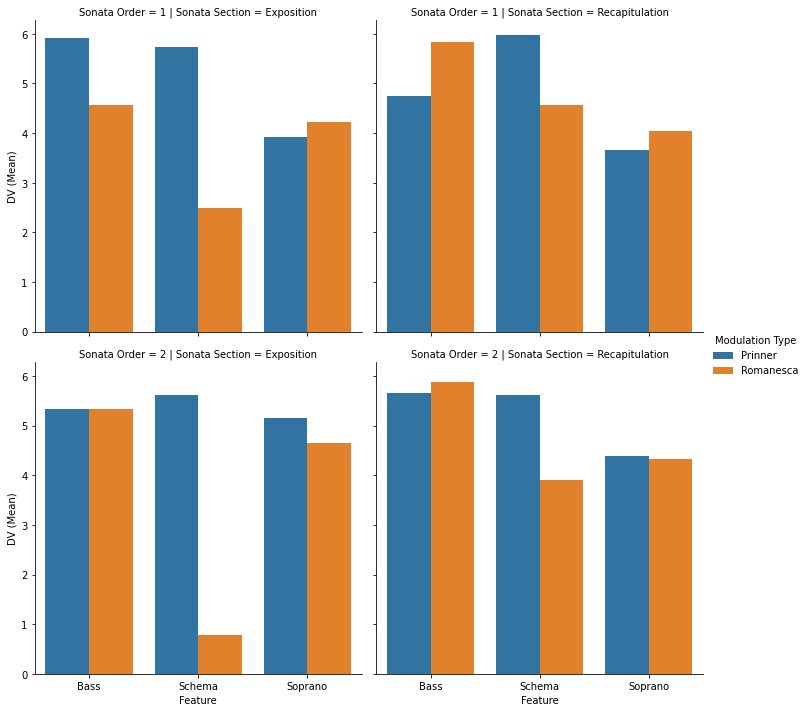

In [57]:
#Seems to be an effect of order, particularly on schema perception interacting with Sonata Section: When presented in 
#the original order (Expo/Recap), Prinner is more perceptible than Romanesca across both
#However, when the recap is presented first, both schema are more equally perceptible across sonata section
#I should do a between groups for order

sns.catplot(data=Plot_T8, x="Feature", y="DV (Mean)", hue='Modulation Type', col='Sonata Section', row='Sonata Order', kind='bar')

In [58]:
Table_Order_DV1_1 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_1

mean       std
                                   DV        DV
Sonata_Order Sonata_Section                    
1            Exposition      4.476190  2.016010
             Recapitulation  4.804762  1.910938
2            Exposition      4.476389  2.582470
             Recapitulation  4.963889  2.075362

In [59]:
Plot_T9 = Table_Order_DV1_1.reset_index(col_level=1)


Plot_T9.columns = ['Sonata Order', "Sonata Section", 'DV (Mean)', 'std']

Plot_T9

,Sonata Order,Sonata Section,DV (Mean),std
0,1,Exposition,4.476190,2.016010
1,1,Recapitulation,4.804762,1.910938
2,2,Exposition,4.476389,2.582470
3,2,Recapitulation,4.963889,2.075362


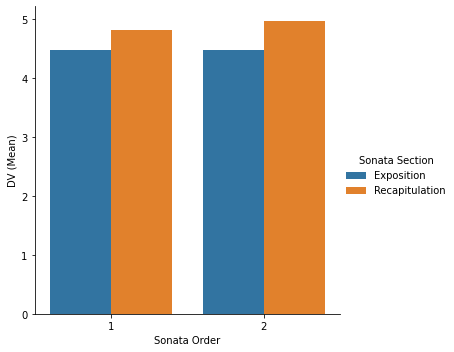

In [60]:
sns.catplot(data=Plot_T9, x="Sonata Order", y="DV (Mean)", hue='Sonata Section', kind='bar')

In [61]:
Table_Order_DV1_2 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order','Sonata_Section', 'Feature'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_2


mean       std
                                           DV        DV
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     5.242857  1.570259
                            Schema   4.114286  2.497647
                            Soprano  4.071429  1.778689
             Recapitulation Bass     5.300000  1.421808
                            Schema   5.264286  1.807934
                            Soprano  3.850000  2.180243
2            Exposition     Bass     5.333333  1.943029
                            Schema   3.195833  3.092976
                            Soprano  4.900000  2.140297
             Recapitulation Bass     5.766667  1.456818
                            Schema   4.766667  2.349036
                            Soprano  4.358333  2.135399

In [62]:
Plot_T10 = Table_Order_DV1_2.reset_index(col_level=1)

Plot_T10.columns = ['Sonata Order', "Sonata Section", "Feature", 'DV (Mean)', 'std']

Plot_T10

,Sonata Order,Sonata Section,Feature,DV (Mean),std
0,1,Exposition,Bass,5.242857,1.570259
1,1,Exposition,Schema,4.114286,2.497647
2,1,Exposition,Soprano,4.071429,1.778689
3,1,Recapitulation,Bass,5.300000,1.421808
4,1,Recapitulation,Schema,5.264286,1.807934
5,1,Recapitulation,Soprano,3.850000,2.180243
6,2,Exposition,Bass,5.333333,1.943029
7,2,Exposition,Schema,3.195833,3.092976
8,2,Exposition,Soprano,4.900000,2.140297
9,2,Recapitulation,Bass,5.766667,1.456818


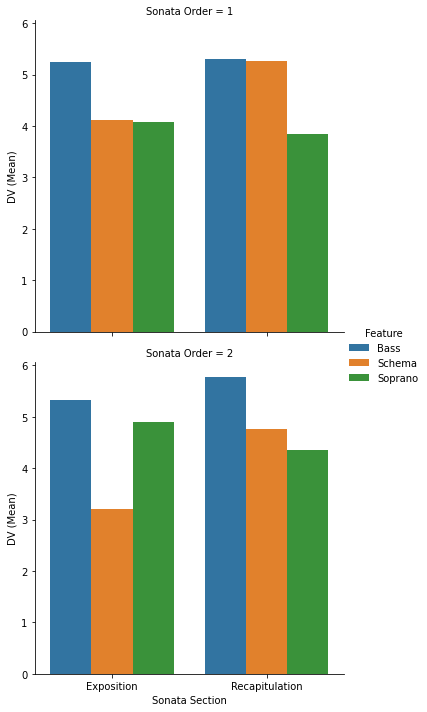

In [63]:
sns.catplot(data=Plot_T10, x="Sonata Section", y="DV (Mean)", hue='Feature',
            row='Sonata Order', kind='bar')

In [64]:
Table_Order_DV1_3 = pd.pivot_table(data=df_DV1_long, index=['Sonata_Order', 'Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Table_Order_DV1_3

mean       std
                                      DV        DV
Sonata_Order Feature Mod_Type                     
1            Bass    Prinner    5.335714  1.479921
                     Romanesca  5.207143  1.513256
             Schema  Prinner    5.857143  1.311907
                     Romanesca  3.521429  2.358023
             Soprano Prinner    3.792857  2.025782
                     Romanesca  4.128571  1.943996
2            Bass    Prinner    5.491667  1.820635
                     Romanesca  5.608333  1.635188
             Schema  Prinner    5.616667  2.075879
                     Romanesca  2.345833  2.545752
             Soprano Prinner    4.766667  2.138806
                     Romanesca  4.491667  2.163314

In [65]:
Plot_T11 = Table_Order_DV1_3.reset_index(col_level=1)

Plot_T11.columns = ['Sonata Order', "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_T11

,Sonata Order,Feature,Modulation Type,DV (Mean),std
0,1,Bass,Prinner,5.335714,1.479921
1,1,Bass,Romanesca,5.207143,1.513256
2,1,Schema,Prinner,5.857143,1.311907
3,1,Schema,Romanesca,3.521429,2.358023
4,1,Soprano,Prinner,3.792857,2.025782
5,1,Soprano,Romanesca,4.128571,1.943996
6,2,Bass,Prinner,5.491667,1.820635
7,2,Bass,Romanesca,5.608333,1.635188
8,2,Schema,Prinner,5.616667,2.075879
9,2,Schema,Romanesca,2.345833,2.545752


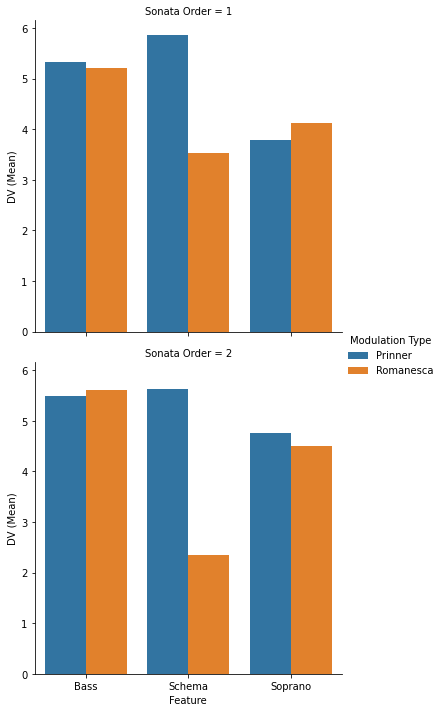

In [66]:
sns.catplot(data=Plot_T11, x='Feature', y="DV (Mean)", hue='Modulation Type',
            row='Sonata Order', kind='bar')

In [67]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

Effects of Expertise Level

In [68]:
Expert_all = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Sonata_Section', 'Feature', 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Expert_all

mean       std
                                                        DV        DV
Expertise_Group Sonata_Section Feature Mod_Type                     
Expert          Exposition     Bass    Prinner    6.350000  1.206234
                                       Romanesca  4.966667  1.675311
                               Schema  Prinner    6.750000  0.612372
                                       Romanesca  1.583333  2.075010
                               Soprano Prinner    5.983333  1.144407
                                       Romanesca  4.400000  2.338376
                Recapitulation Bass    Prinner    6.016667  1.637580
                                       Romanesca  5.550000  1.499000
                               Schema  Prinner    6.250000  1.172604
                                       Romanesca  2.883333  1.683350
                               Soprano Prinner    4.533333  2.286190
                                       Romanesca  4.566667  2.158394
Intermediate    Exposition     Bass    Prinner    5.144444  1.807008
                                       Romanesca  5.811111  1.030102
                               Schema  Prinner    5.677778  1.934411
                                       Romanesca  1.111111  2.204793
                               Soprano Prinner    4.488889  2.018319
                                       Romanesca  5.488889  1.483614
                Recapitulation Bass    Prinner    4.977778  1.769730
                                       Romanesca  6.211111  0.727056
                               Schema  Prinner    5.866667  1.570032
                                       Romanesca  5.711111  1.751745
                               Soprano Prinner    4.588889  2.316487
                                       Romanesca  4.988889  1.683333
Novice          Exposition     Bass    Prinner    5.225000  2.098214
                                       Romanesca  3.500000  3.000000
                               Schema  Prinner    3.975000  2.209638
                                       Romanesca  1.825000  1.840969
                               Soprano Prinner    3.250000  2.217356
                                       Romanesca  2.375000  1.600781
                Recapitulation Bass    Prinner    5.075000  1.776467
                                       Romanesca  5.550000  1.239624
                               Schema  Prinner    4.750000  2.872281
                                       Romanesca  2.525000  1.761391
                               Soprano Prinner    2.425000  1.588238
                                       Romanesca  2.000000  1.414214

In [69]:
Plot_Ex = Expert_all.reset_index(col_level=1)

Plot_Ex.columns = ['Expertise Group', 'Sonata Section', "Feature", "Modulation Type", 'DV (Mean)', 'std']

Plot_Ex

,Expertise Group,Sonata Section,Feature,Modulation Type,DV (Mean),std
0,Expert,Exposition,Bass,Prinner,6.350000,1.206234
1,Expert,Exposition,Bass,Romanesca,4.966667,1.675311
2,Expert,Exposition,Schema,Prinner,6.750000,0.612372
3,Expert,Exposition,Schema,Romanesca,1.583333,2.075010
4,Expert,Exposition,Soprano,Prinner,5.983333,1.144407
5,Expert,Exposition,Soprano,Romanesca,4.400000,2.338376
6,Expert,Recapitulation,Bass,Prinner,6.016667,1.637580
7,Expert,Recapitulation,Bass,Romanesca,5.550000,1.499000
8,Expert,Recapitulation,Schema,Prinner,6.250000,1.172604
9,Expert,Recapitulation,Schema,Romanesca,2.883333,1.683350


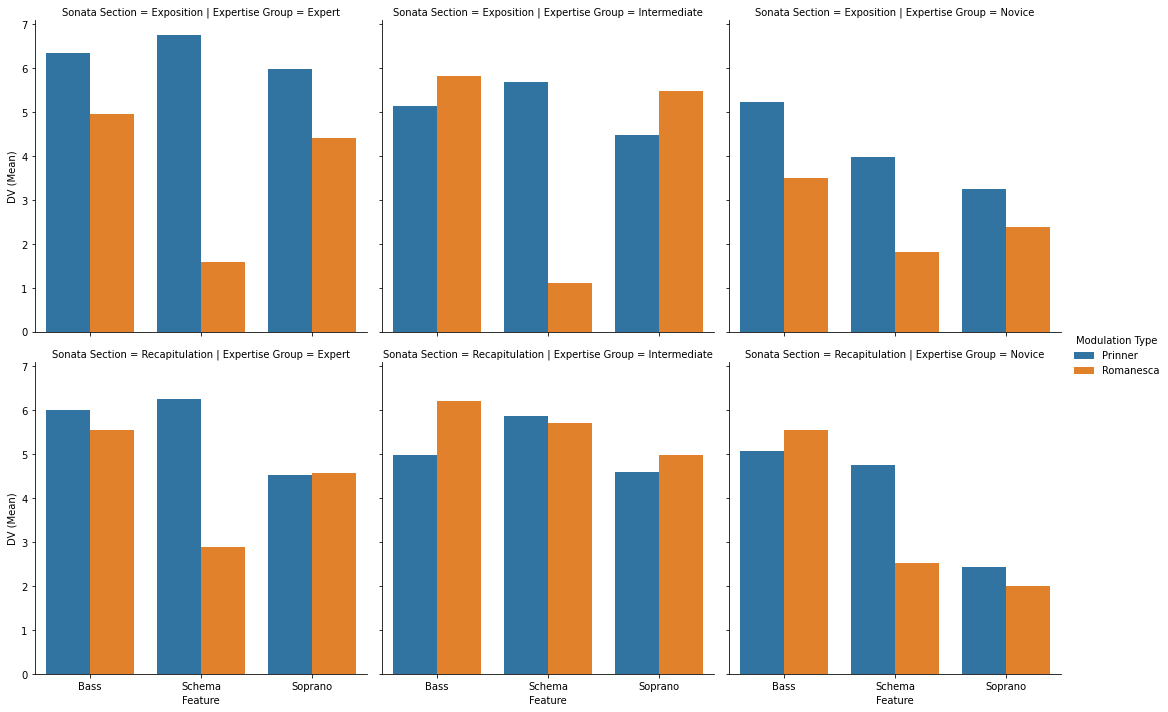

In [70]:
sns.catplot(data=Plot_Ex, x='Feature', y="DV (Mean)", hue='Modulation Type', col="Expertise Group",
            row='Sonata Section', kind='bar')

In [71]:
Expert_Mod = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Mod_Type'], values="DV", aggfunc=['mean','std'])

Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    5.980556  1.507092
                Romanesca  3.991667  2.248984
Intermediate    Prinner    5.124074  1.895768
                Romanesca  4.887037  2.288944
Novice          Prinner    4.116667  2.178086
                Romanesca  2.962500  2.123740

In [72]:
Plot_ExMod = Expert_Mod.reset_index(col_level=1)

Plot_ExMod.columns = ['Expertise Group', "Modulation Type", 'DV (Mean)', 'std']

Plot_ExMod

,Expertise Group,Modulation Type,DV (Mean),std
0,Expert,Prinner,5.980556,1.507092
1,Expert,Romanesca,3.991667,2.248984
2,Intermediate,Prinner,5.124074,1.895768
3,Intermediate,Romanesca,4.887037,2.288944
4,Novice,Prinner,4.116667,2.178086
5,Novice,Romanesca,2.962500,2.123740


In [73]:
Expert_Feat = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group", 'Feature'], values="DV", aggfunc=['mean','std'])


Expert_Feat

mean       std
                               DV        DV
Expertise_Group Feature                    
Expert          Bass     5.720833  1.509961
                Schema   4.366667  2.633343
                Soprano  4.870833  2.014184
Intermediate    Bass     5.536111  1.442845
                Schema   4.591667  2.718442
                Soprano  4.888889  1.862223
Novice          Bass     4.837500  2.070386
                Schema   3.268750  2.312205
                Soprano  2.512500  1.619413

In [74]:
Plot_ExFeat = Expert_Feat.reset_index(col_level=1)

Plot_ExFeat.columns = ['Expertise Group', "Feature", 'DV (Mean)', 'std']

Plot_ExFeat

,Expertise Group,Feature,DV (Mean),std
0,Expert,Bass,5.720833,1.509961
1,Expert,Schema,4.366667,2.633343
2,Expert,Soprano,4.870833,2.014184
3,Intermediate,Bass,5.536111,1.442845
4,Intermediate,Schema,4.591667,2.718442
5,Intermediate,Soprano,4.888889,1.862223
6,Novice,Bass,4.837500,2.070386
7,Novice,Schema,3.268750,2.312205
8,Novice,Soprano,2.512500,1.619413


## 3. Exploratory Analysis: DV2 (ease of change)

### a. Outliers<a id = 'O2'></a>

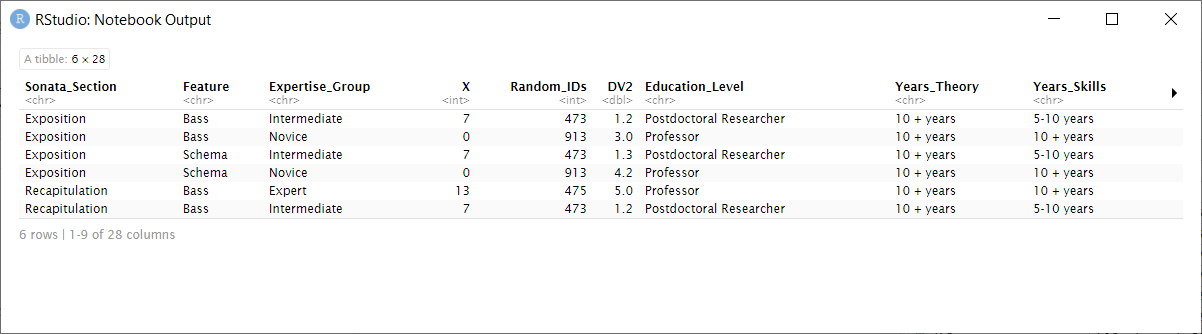

### b. Data Summaries and Pivot Tables<a id = 'DS2'></a>

##### i. Main Effects<a id = 'DS1i'></a>

In [75]:
#ease of change ratings are nearly equal, but low across sonata section types. No main effect of section is likely. 

Table_Sonata_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Sonata_DV2

,mean,std
,DV2,DV2
Sonata_Section,,
Exposition,2.426316,2.459713
Recapitulation,3.570175,1.948164


In [76]:
#May be a main effect of feature, soprano lowest ease of change

Table_Feature_DV2 = pd.pivot_table(data=df_DV2_long, index=['Feature'], values="DV2", aggfunc=['mean','std'])

Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,2.107895,2.477617
Schema,3.742105,2.071640
Soprano,3.144737,2.018522


In [77]:
# This finding is a bit odd. Despite low ease ratings between schema (Prinner, Romanesca) in the recap in DV1, here the
#exposition ease of change rating is highest for this group. Ease of change may not be reflecting differences in the interpretability
#between modulation types, particpants may have put a high rating if they could somewhat switch between one really convincing hearing
#and one not convincing hearing. I was expecting if Prinner/Romanesca hearing ease was low in DV1, that DV2 would also be low

Table_All_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_All_DV2

mean       std
                             DV2       DV2
Sonata_Section Feature                    
Exposition     Bass     0.000000  0.000000
               Schema   3.836842  2.147922
               Soprano  3.442105  2.192238
Recapitulation Bass     4.215789  1.799464
               Schema   3.647368  2.046778
               Soprano  2.847368  1.839193

#### ii. Effects of Order<a id = 'DS1ii'></a>

In [78]:
Table_OrderALL_DV2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section','Feature'], values="DV2", aggfunc=['mean','std'])

Table_OrderALL_DV2

mean       std
                                          DV2       DV2
Sonata_Order Sonata_Section Feature                    
1            Exposition     Bass     0.000000  0.000000
                            Schema   3.757143  2.011514
                            Soprano  3.000000  1.686219
             Recapitulation Bass     3.728571  2.011396
                            Schema   3.871429  1.977974
                            Soprano  2.714286  1.879210
2            Exposition     Bass     0.000000  0.000000
                            Schema   3.883333  2.309991
                            Soprano  3.700000  2.473128
             Recapitulation Bass     4.500000  1.689002
                            Schema   3.516667  2.161158
                            Soprano  2.925000  1.895029

In [79]:
Table_Order_DV2_1 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Sonata_Section'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_1

mean       std
                                  DV2       DV2
Sonata_Order Sonata_Section                    
1            Exposition      2.252381  2.197867
             Recapitulation  3.438095  1.930149
2            Exposition      2.527778  2.625111
             Recapitulation  3.647222  1.981700

In [80]:
Table_Order_DV2_2 = pd.pivot_table(data=df_DV2_long, index=['Sonata_Order','Feature'], values="DV2", aggfunc=['mean','std'])

Table_Order_DV2_2

mean       std
                           DV2       DV2
Sonata_Order Feature                    
1            Bass     1.864286  2.368579
             Schema   3.814286  1.917473
             Soprano  2.857143  1.721678
2            Bass     2.250000  2.578169
             Schema   3.700000  2.195648
             Soprano  3.312500  2.190754

## 4. Visualizations for RM ANOVA: DV1

Shapiro Test Output from R

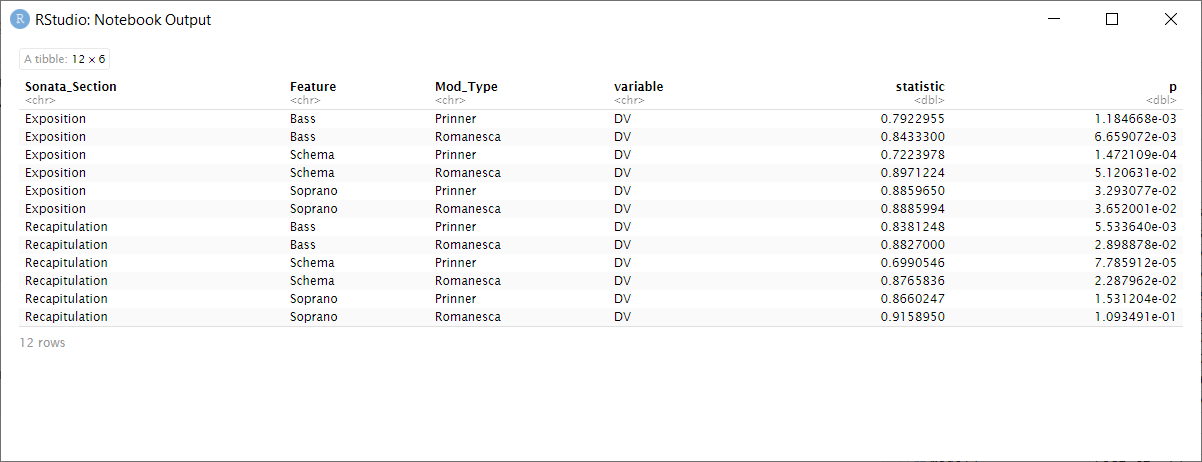

Levene Test Output

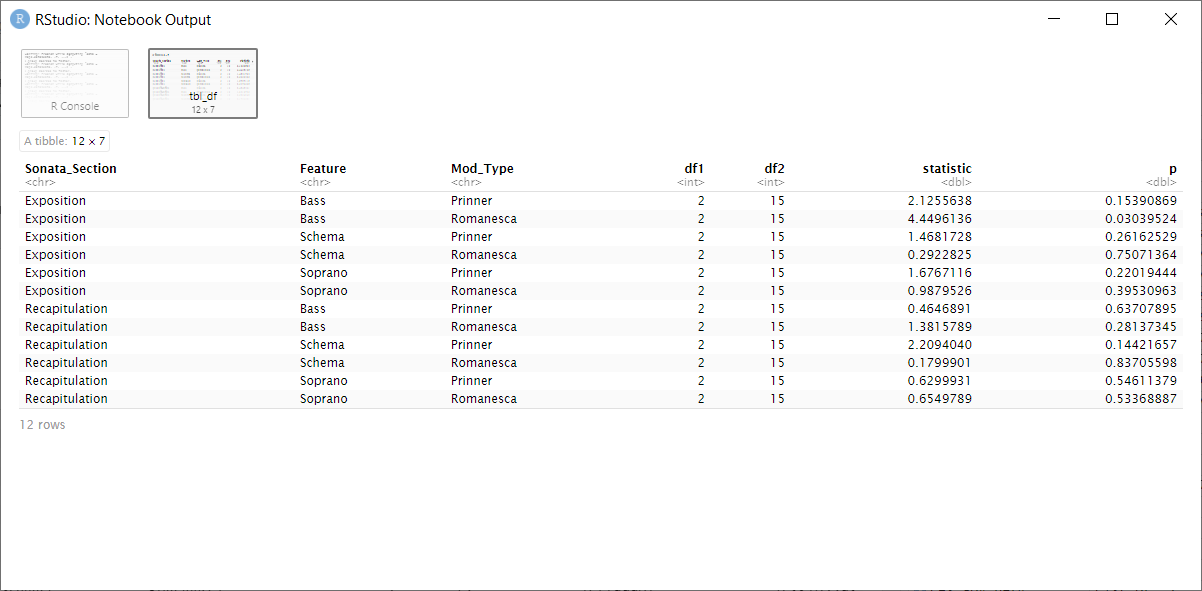

ANOVA TABLE

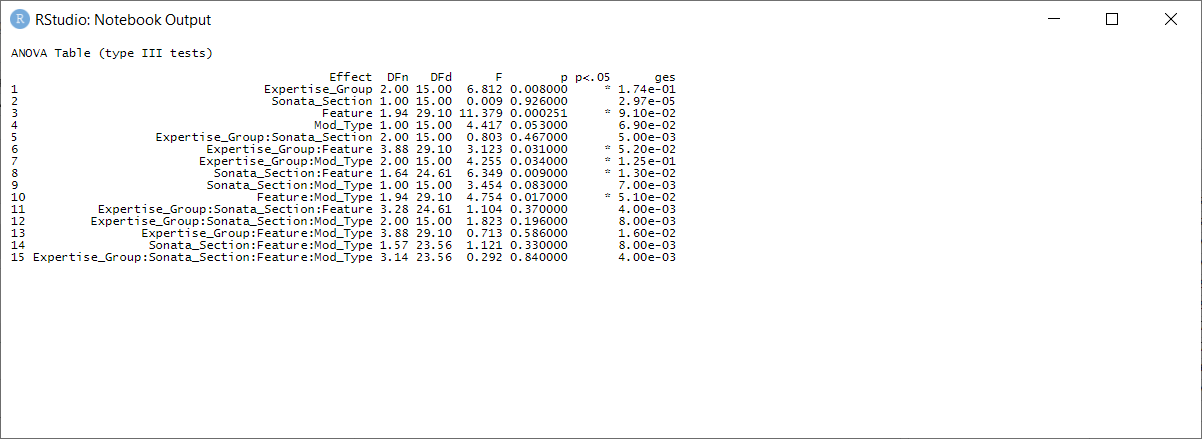

Nonsignificant Effects

In [81]:
Table_Sonata_Section_DV1

,mean,std
,DV,DV
Sonata_Section,,
Exposition,4.476316,2.380128
Recapitulation,4.905263,2.009264


Nonsignificant main effect of sonata section, F(1, 15) = 0.009, p = 0.926, Exposition (M = 4.93, sd = 2.04) was equal to recapitulation (M = 4.90, sd = 2.05) 

In [82]:
table1 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group','Sonata_Section'], aggfunc=['mean', 'std'])

table1

mean       std
                                      DV        DV
Expertise_Group Sonata_Section                    
Expert          Exposition      5.005556  2.304771
                Recapitulation  4.966667  2.012674
Intermediate    Exposition      4.620370  2.366063
                Recapitulation  5.390741  1.720823
Novice          Exposition      3.358333  2.248848
                Recapitulation  3.720833  2.196238

Nonsignificant two-way interaction between Expertise group and sonata section, F(2, 15) = 0.803, p = 0.467. All groups had nonsignificant differences between exposition and recapitulation: Expert (Mexpo = 5.30, sd = 2.08 | Mrecap = 4.96, sd = 2.17), Intermediate (Mexpo = 5.42, sd = 1.61 | Mrecap = 5.39, sd = 1.72), Novice (Mexpo = 3.40, sd = 2.19 | Mrecap = 3.72, sd = 2.19)

In [83]:
table2 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Sonata_Section', 'Mod_Type'], aggfunc=['mean', 'std'])

table2

mean       std
                                DV        DV
Sonata_Section Mod_Type                     
Exposition     Prinner    5.300000  1.891050
               Romanesca  3.652632  2.544399
Recapitulation Prinner    5.064912  2.016139
               Romanesca  4.745614  2.007403

Nonsignificant two-way interaction between sonata section and modulation type, F(1, 15) = 3.45, p = 0.083. Both Prinner and Romanesca were equally available in the Exposition (Mprinner = 5.33, sd = 1.93 | Mromanesca = 4.54, sd = 2.09) and Recapitulation (Mprinner = 5.08, sd = 2.06 | Mromanesca = 4.71, sd = 2.04)

In [84]:
table3 = pd.pivot_table(data=df_DV1_long, values='DV', index=['Expertise_Group', 'Sonata_Section', 'Feature'], aggfunc=['mean', 'std'])

table3

mean       std
                                              DV        DV
Expertise_Group Sonata_Section Feature                    
Expert          Exposition     Bass     5.658333  1.568125
                               Schema   4.166667  3.067227
                               Soprano  5.191667  1.940224
                Recapitulation Bass     5.783333  1.516475
                               Schema   4.566667  2.237016
                               Soprano  4.550000  2.119820
Intermediate    Exposition     Bass     5.477778  1.467513
                               Schema   3.394444  3.093346
                               Soprano  4.988889  1.793744
                Recapitulation Bass     5.594444  1.457828
                               Schema   5.788889  1.615691
                               Soprano  4.788889  1.975107
Novice          Exposition     Bass     4.362500  2.567899
                               Schema   2.900000  2.205836
                               Soprano  2.812500  1.850434
                Recapitulation Bass     5.312500  1.440672
                               Schema   3.637500  2.505957
                               Soprano  2.212500  1.410610

### a. Main Effects<a id = 'RM1a'></a>

Expertise Group

RM ANOVA showed a main effect of group F(2, 15) = 6.81, p = 0.008.

Tukey_HSD test revealed that the Expert (M = 5.13, sd = 2.12) and Intermediate (M = 5.40, sd = 1.66) groups differed significantly from the Novice (M = 3.56, sd = 2.17) groups.  

Expert and novice HSD: (p = 0.0001, 95% C.I. = [-2.44, -0.696]
Intermediate and novice HSD: (p = 0.000000259, 95% C.I. = [-2.63, -1.05]


In [85]:
Expertise_Table_DV1

,mean,std
,DV,DV
Expertise_Group,,
Expert,4.986111,2.148455
Intermediate,5.005556,2.095114
Novice,3.539583,2.206541


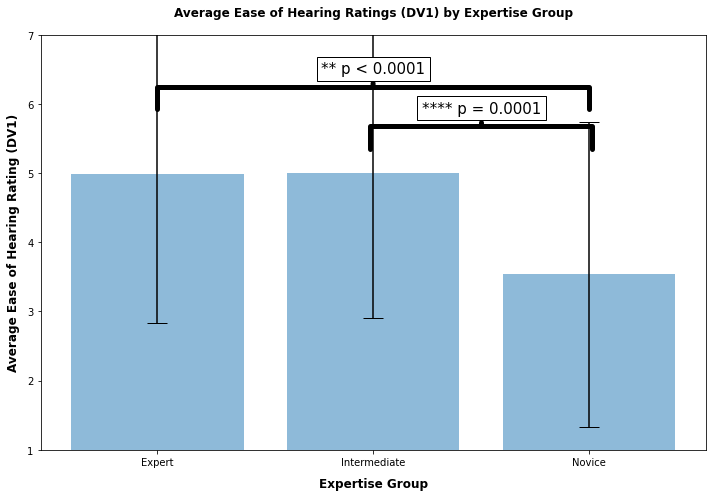

In [86]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex = Expertise_Table_DV1[('mean', "DV")]
std_ex = Expertise_Table_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex, yerr=std_ex, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
ax.annotate('** p < 0.0001', xy=(0.5, 0.87), xytext=(0.5, 0.90), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.4, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p = 0.0001', xy=(0.663, 0.775), xytext=(0.663, 0.805), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.4, lengthB=1.5', facecolor='blue', lw=5.0))
# Save
plt.tight_layout()
plt.savefig('Average DV1_Expertise Main_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()


Feature

There was a main effect of feature, F(1.94, 29.10) = 11.37, p = 0.0002. Corrected for violation of sphericty violation using GG, ε = 0.970

Post-hoc Tucky HSD showed that this effect comes from a statistically significant difference between the Bass (M = 5.45, sd = 1.65) and Soprano (M = 4.35, sd = 2.12) features, p = 0.003.

Bass and soprano HSD: (p =0.003, 95% C.I. = [-1.89, -0.313]

In [87]:
Table_Feature_DV1

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Schema,4.242105,2.628727
Soprano,4.382895,2.081435


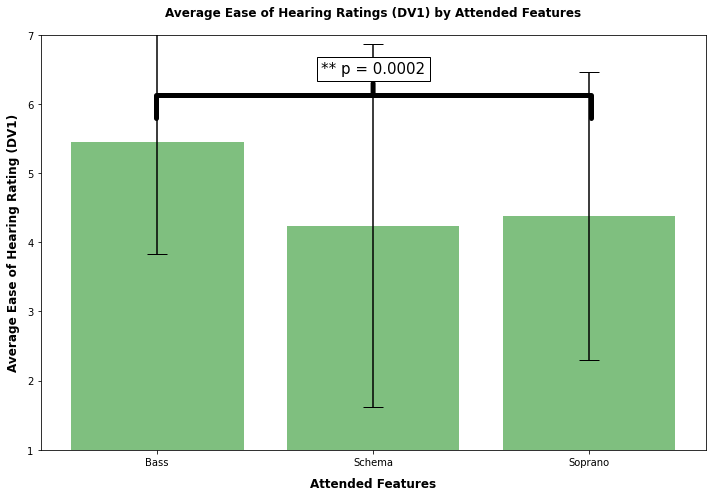

In [88]:
Features = ["Bass", "Schema", "Soprano"]
y_vals_ft = Table_Feature_DV1[('mean', "DV")]
std_ft = Table_Feature_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features, y_vals_ft, yerr=std_ft, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])
 

#annotations
ax.annotate('** p = 0.0002', xy=(0.5, 0.85), xytext=(0.5, 0.9), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main_all_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



In [89]:
df_feature_noschema = df_DV1_long[df_DV1_long['Feature'] != 'Schema']

df_feature_noschema

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
Index,,,,,,,,,,,,,,,,,,,,,
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,244,Recapitulation,Soprano,Prinner,1.2,Professor,10 + years,10 + years,"I am an expert (analysis, playing, composition...",I have heard this before,...,Expert,2,1,2,1,1,2,2,2,1
16,148,Recapitulation,Soprano,Prinner,3.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
17,701,Recapitulation,Soprano,Prinner,7.0,Graduate Student,10 + years,10 + years,Very familiar,I have heard this before,...,Intermediate,2,3,1,2,2,6,1,2,2


In [90]:
Table_features = pd.pivot_table(data=df_feature_noschema, index=['Feature'], values="DV", aggfunc=['mean','std'] )

Table_features

,mean,std
,DV,DV
Feature,,
Bass,5.447368,1.623287
Soprano,4.382895,2.081435


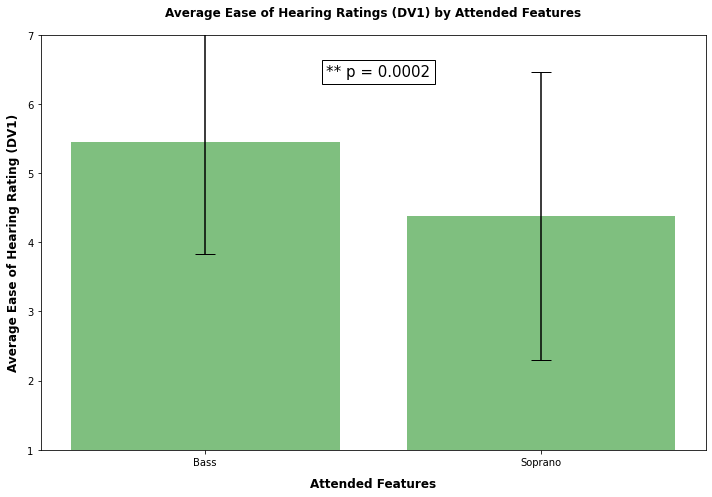

In [91]:
Features2 = ["Bass", "Soprano"]
y_vals_ft2 = Table_features[('mean', "DV")]
std_ft2 = Table_features[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Features2, y_vals_ft2, yerr=std_ft2, color = 'green', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Attended Features", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Attended Features', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "** p = 0.0002", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Average DV1_Features Main_NoOut.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()



Modulation Type *NONSIGNIFICANT NOW*

Nonsignficant main effect of mod type, F(1,15)= 4.41, p = 0.053. 

Prinner (M = 5.21, sd = 1.99) higher than Romanesca (M = 4.62, sd = 2.06)

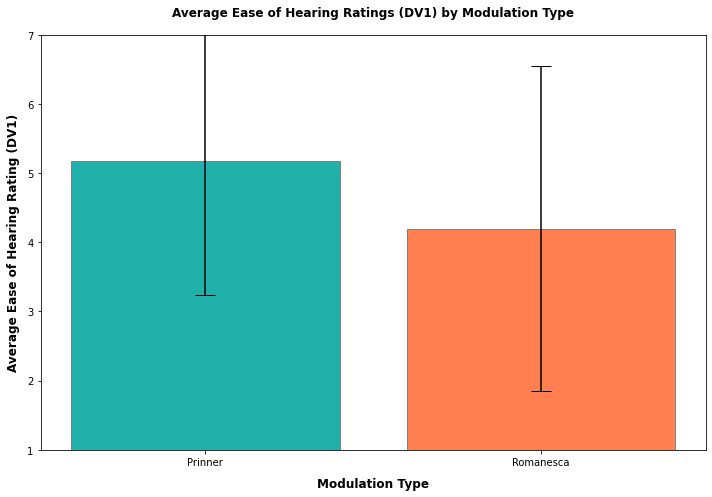

In [92]:
Mods = ["Prinner", "Romanesca"]
mod_vals = Table_Schema_DV1[('mean', "DV")]
mod_std = Table_Schema_DV1[('std', "DV")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Mods, mod_vals, yerr=mod_std, color = ['lightseagreen', 'coral'], align='center', alpha=1, ecolor='black', capsize=10,
        edgecolor ='grey')

ax.set_ylabel('Average Ease of Hearing Rating (DV1)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Modulation Type", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Hearing Ratings (DV1) by Modulation Type', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations
t = ax.text(0.36, 6.4, "", size=15,  bbox=dict(boxstyle='square', fc='white'))

#save 
plt.tight_layout()
plt.savefig('Mod_Type_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

# Show Plot
plt.show()

In [93]:
Table_Schema_DV1

,mean,std
,DV,DV
Mod_Type,,
Prinner,5.182456,1.949506
Romanesca,4.199123,2.346622


### b. Interactions<a id = 'RM1b'></a>

Expertise Group by Feature

The RM ANOVA showed an interaction between Expertise Group and Feature, F(3.88, 29.10) = 3.12, p = 0.031. Corrected for violation of sphericity violation using GG, ε = 0.970

Post-hoc Tucky HSD test showed that the Novice group, the Bass (M = 4.83, sd = 2.07) and Soprano (M = 2.51, sd = 1.62) differed significantly from one another (p = 0.005, 95% C.I. = [-4.03, -0.619]

In [94]:
Expert_Feat

mean       std
                               DV        DV
Expertise_Group Feature                    
Expert          Bass     5.720833  1.509961
                Schema   4.366667  2.633343
                Soprano  4.870833  2.014184
Intermediate    Bass     5.536111  1.442845
                Schema   4.591667  2.718442
                Soprano  4.888889  1.862223
Novice          Bass     4.837500  2.070386
                Schema   3.268750  2.312205
                Soprano  2.512500  1.619413

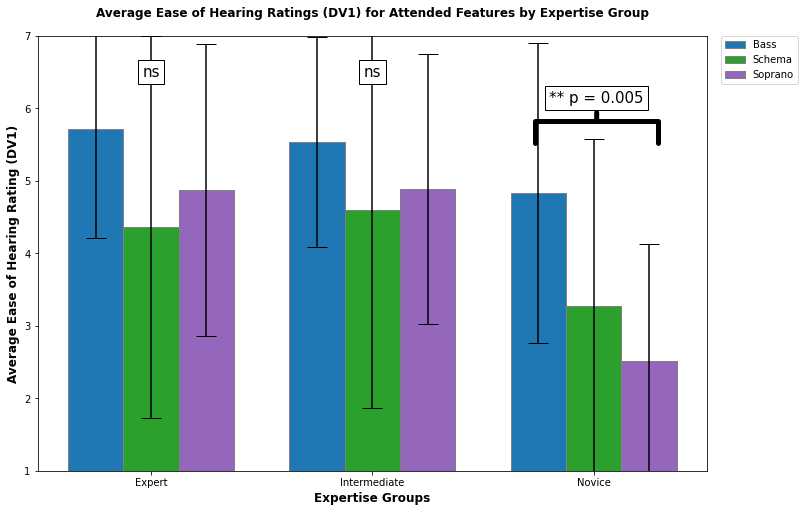

In [95]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_ex = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('mean', "DV")]].squeeze()
schema_ex = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('mean', "DV")]].squeeze()
sop_ex = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_ex_std = Expert_Feat.loc[[('Expert', 'Bass'), ('Intermediate', 'Bass'), ('Novice', 'Bass')], [('std', "DV")]].squeeze()
schema_ex_std = Expert_Feat.loc[[('Expert', 'Schema'), ('Intermediate', 'Schema'), ('Novice', 'Schema')], [('std', "DV")]].squeeze()
sop_ex_std = Expert_Feat.loc[[('Expert', 'Soprano'), ('Intermediate', 'Soprano'), ('Novice', 'Soprano')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_ex = np.arange(len(bass_ex))
br2_ex = [x + barWidth for x in br1_ex]
br3_ex = [x + barWidth for x in br2_ex]
 
# Make the plot
plt.bar(br1_ex, bass_ex, yerr=bass_ex_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_ex, schema_ex, yerr=schema_ex_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_ex, sop_ex, yerr=sop_ex_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_ex))],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

#annotations 
t1 = ax.text(0.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.25, 6.5, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
#t3 = ax.text(2.36, 6.5, "** p = 0.005", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

ax.annotate('** p = 0.005', xy=(0.835, 0.8), xytext=(0.835, 0.84), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.1, lengthB=1.5', facecolor='blue', lw=5.0))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Expertise_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Expertise Group by Modulation Type

F(2, 15) = 4.25, p = 0.034.

Post hoc Tucky HSD revealed that that for the Expert group only, the Prinner (M = 6.24, sd = 1.49) and Romanesca (M = 4.02, sd = 2.08) differed significantly, (p < 0.0001, 95% C.I. = [-3.15, -1.28]


p = 0.0000145

In [96]:
Expert_Mod

mean       std
                                 DV        DV
Expertise_Group Mod_Type                     
Expert          Prinner    5.980556  1.507092
                Romanesca  3.991667  2.248984
Intermediate    Prinner    5.124074  1.895768
                Romanesca  4.887037  2.288944
Novice          Prinner    4.116667  2.178086
                Romanesca  2.962500  2.123740

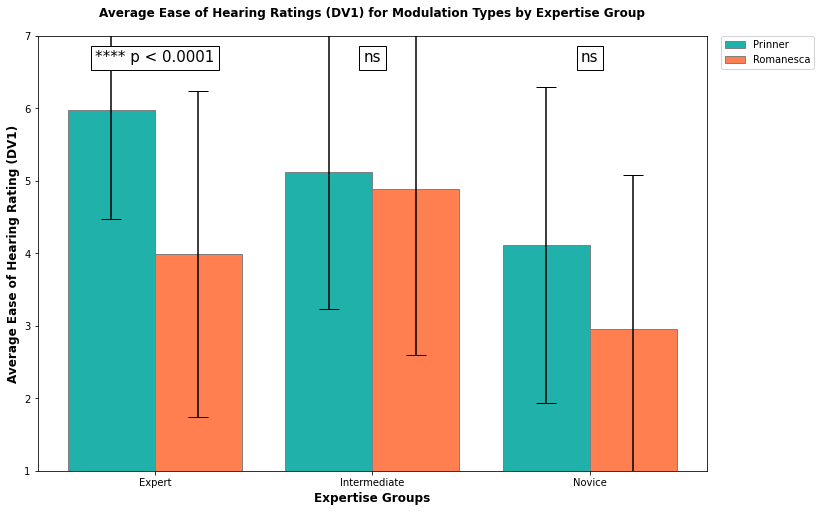

In [97]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_ex = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('mean', "DV")]].squeeze()
Rom_ex = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('mean', "DV")]].squeeze()


#stds
Prin_ex_std = Expert_Mod.loc[[('Expert', 'Prinner'), ('Intermediate', 'Prinner'), ('Novice', 'Prinner')], [('std', "DV")]].squeeze()
Rom_ex_std = Expert_Mod.loc[[('Expert', 'Romanesca'), ('Intermediate', 'Romanesca'), ('Novice', 'Romanesca')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_md = np.arange(len(Prin_ex))
br2_md = [x + (barWidth) for x in br1_md]
br3_md = [x + (barWidth*0.5) for x in br2_md]
 
# Make the plot
plt.bar(br1_md, Prin_ex, yerr=Prin_ex_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_md, Rom_ex, yerr=Rom_ex_std, ecolor='black', capsize=10, color ='coral', width = barWidth, 
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Expertise Groups', fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(3)],
        ['Expert', 'Intermediate', 'Novice'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Types by Expertise Group', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.20, 6.7, "**** p < 0.0001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.7, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))


plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Expertise_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Sonata Section by Feature

F(1.64, 24.61) = 6.34, p =0.009, Corrected for violation of sphericity violation using GG, ε = 0.820

Tukey HSD post hoc revealed that the Bass (M = 5.60, sd = 1.47) and Soprano (M = 4.12, sd = 2.17) for the Recap differed significantly, (p = 0.005, 95% C.I. = [-2.58, -0.364]

In [98]:
Table_Sect_Feat_DV1

mean       std
                              DV        DV
Sonata_Section Feature                    
Exposition     Bass     5.300000  1.793080
               Schema   3.534211  2.887932
               Soprano  4.594737  2.030570
Recapitulation Bass     5.594737  1.442773
               Schema   4.950000  2.153533
               Soprano  4.171053  2.136922

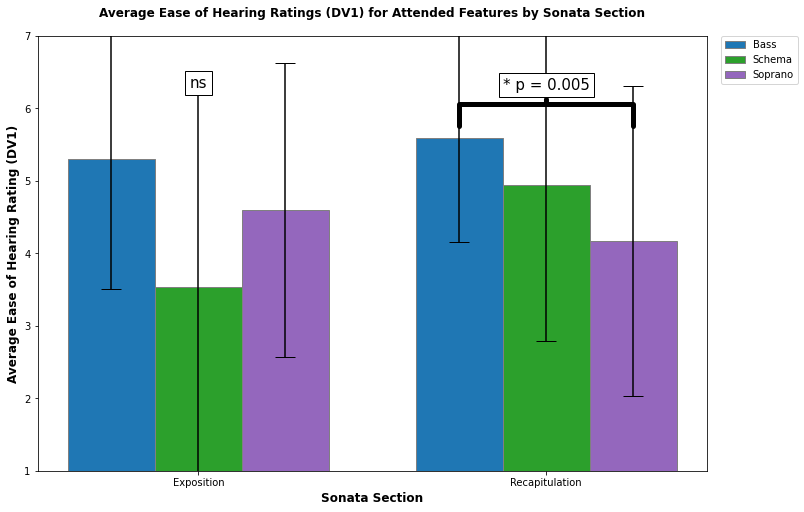

In [99]:
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
bass_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('mean', "DV")]].squeeze()
schema_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('mean', "DV")]].squeeze()
sop_s = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('mean', "DV")]].squeeze()

#stds
bass_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Bass'), ('Recapitulation', 'Bass')], [('std', "DV")]].squeeze()
schema_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Schema'), ('Recapitulation', 'Schema')], [('std', "DV")]].squeeze()
sop_s_std = Table_Sect_Feat_DV1.loc[[('Exposition', 'Soprano'), ('Recapitulation', 'Soprano')], [('std', "DV")]].squeeze()
 
# Set position of bar on X axis
br1_s = np.arange(len(bass_s))
br2_s = [x + barWidth for x in br1_s]
br3_s = [x + barWidth for x in br2_s]
 
# Make the plot
plt.bar(br1_s, bass_s, yerr=bass_s_std, ecolor='black', capsize=10, color ='tab:blue', width = barWidth,
        edgecolor ='grey', label ='Bass')
plt.bar(br2_s, schema_s, yerr=schema_s_std, ecolor='black', capsize=10, color ='tab:green', width = barWidth,
        edgecolor ='grey', label ='Schema')
plt.bar(br3_s, sop_s, yerr=sop_s_std, ecolor='black', capsize=10, color ='tab:purple', width = barWidth,
        edgecolor ='grey', label ='Soprano')
 
# Adding Xticks
plt.xlabel('Sonata Section',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(bass_s))],
        ['Exposition', 'Recapitulation'])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Attended Features by Sonata Section', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
t1 = ax.text(0.25, 6.35, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
ax.annotate('* p = 0.005', xy=(0.76, 0.84), xytext=(0.76, 0.87), xycoords=('axes fraction'),
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=1.5', facecolor='blue', lw=5.0))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Feature by Sonata Section_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


Feature by Modulation Type

F(1.95, 29.10) = 4.75, p = 0.017, Corrected for violation of sphericity violation using GG, ε = 0.970.

Post-hoc Tukey HSD revealed that for the Schema attending feature, the Prinner (M = 5.73, sd = 1.86) and Romanesca (M = 4.16, sd = 2.23) differed significantly, (p = 0.001, 95% C.I. = [-2.53, -0.602])

In [100]:
Table_Feat_Mod_DV1

mean       std
                         DV        DV
Feature Mod_Type                     
Bass    Prinner    5.434211  1.683991
        Romanesca  5.460526  1.582769
Schema  Prinner    5.705263  1.815838
        Romanesca  2.778947  2.512472
Soprano Prinner    4.407895  2.124170
        Romanesca  4.357895  2.066023

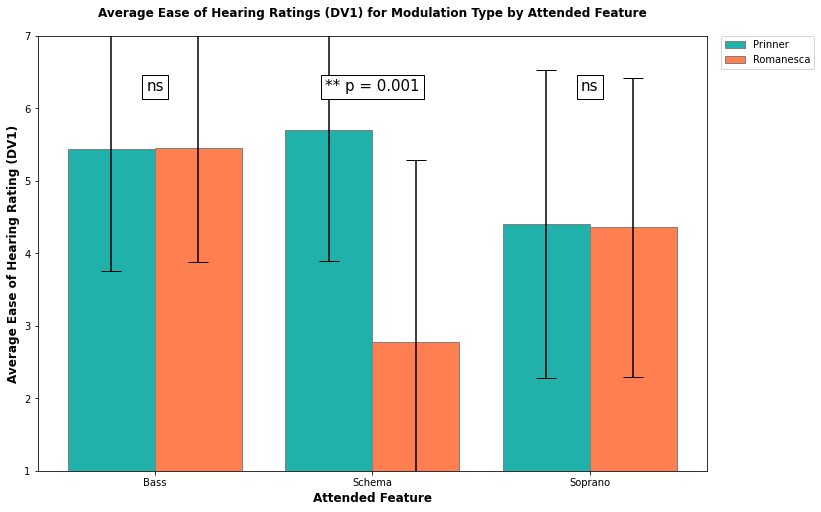

In [101]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_m = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_m_std = Table_Feat_Mod_DV1.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm = np.arange(len(Prin_m))
br2_fm = [x + barWidth for x in br1_fm]
br3_fm = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_fm, Prin_m, yerr=Prin_m_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm, Rom_m, yerr=Rom_m_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])

# annotations
#ax.annotate('** p = 0.004', xy=(0.175, 0.84), xytext=(0.175, 0.88), xycoords=('axes fraction'),
            #fontsize=15, ha='center', va='bottom',
            #bbox=dict(boxstyle='square', fc='white'),
            #arrowprops=dict(arrowstyle='-[, widthB=2.9, lengthB=1.5', facecolor='blue', lw=5.0))

t1 = ax.text(0.20, 6.3, 'ns', ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t2 = ax.text(1.20, 6.3, "** p = 0.001", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))
t3 = ax.text(2.20, 6.3, "ns", ha="center", va="center", size=15,  bbox=dict(boxstyle='square', fc='white'))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


_______
_______

## 5. Visualizations for RM ANOVA: DV2

DV2 Shapiro Test

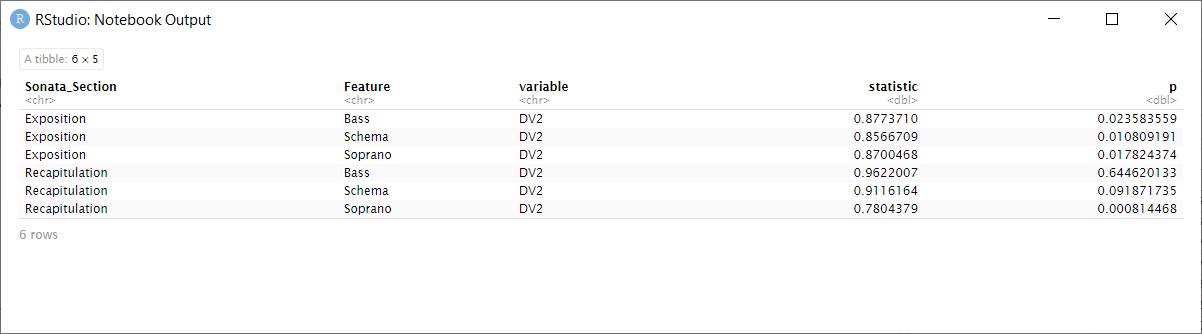

DV2 Levene

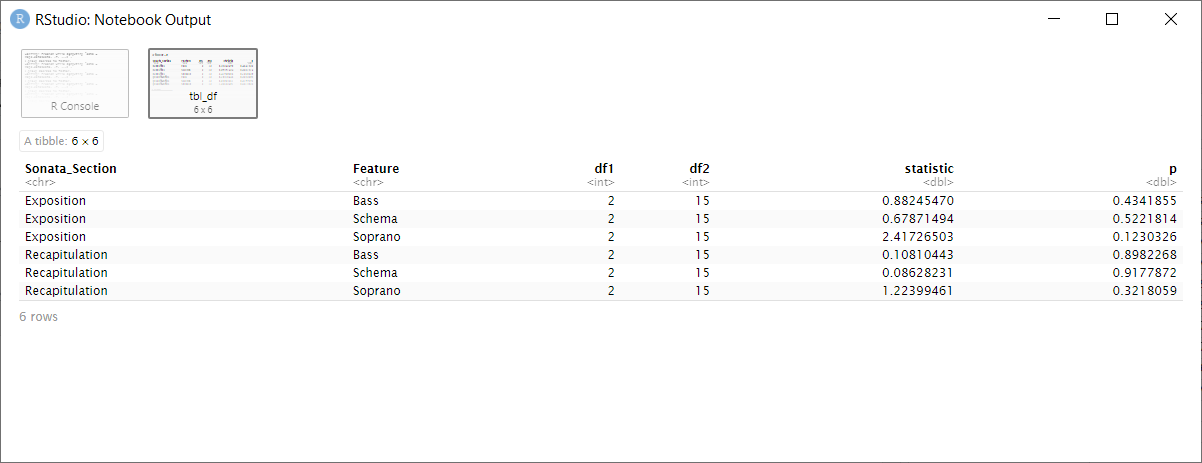

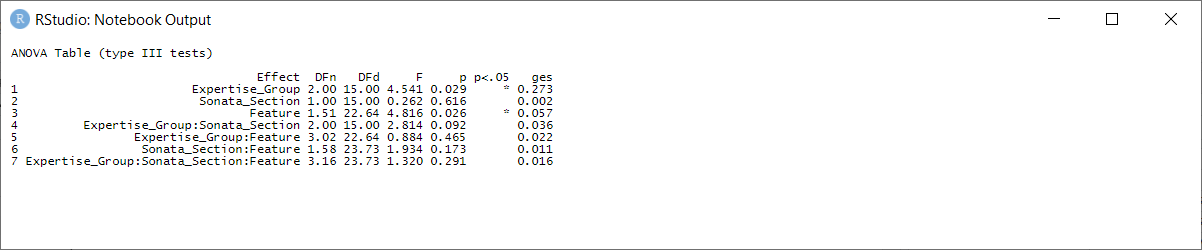

NONSIG

Nonsignficiant main effect of Sonata Section (F(1,15) = 0.262, p = 0.616

### a. Main Effects<a id = 'RM2a'></a>

Expertise Group

RM ANOVA revealed a main effect of expertise group, F(2, 15) = 4.54, p = 0.029 

Post doc Tukey HSD revealed that Expert and Intermediate groups differed from the Novice Group: Expert (M = 3.57, sd = 2.06) and Intermediate (M = 4.49, sd = 1.82), Novice (M = 1.88, sd = 1.50) groups.

Expert and Intermediate (p = 0.0735, C.I. 95% C.I. = [-0.068, 1.91])
Expert and Novice (p = 0.00273, 95% C.I. = [-2.89, -0.511]
Intermediate and Novice (p < 0.0001, 95% C.I. = [-3.68, -1.55]
p = 0.000000170

In [102]:
Expert_DV2 = pd.pivot_table(data=df_DV2_long, index=["Expertise_Group"], values="DV2", aggfunc=['mean','std'])

Expert_DV2

,mean,std
,DV2,DV2
Expertise_Group,,
Expert,2.925000,2.198750
Intermediate,3.657407,2.337359
Novice,1.625000,1.628082


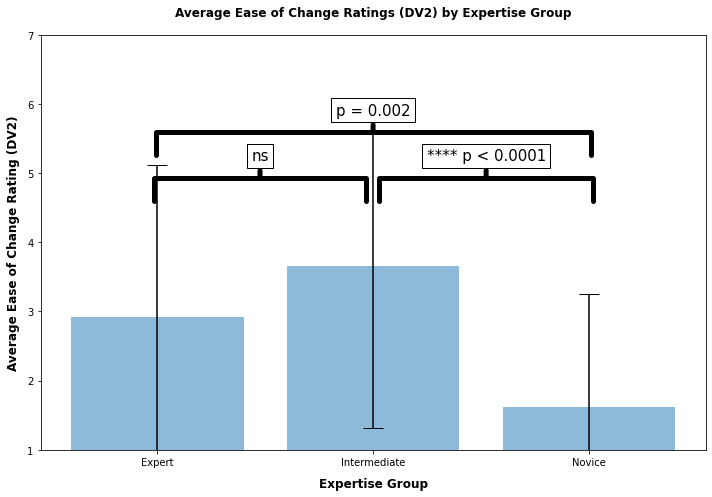

In [103]:
Groups = ["Expert", "Intermediate", 'Novice']
y_vals_ex2 = Expert_DV2[('mean', "DV2")]
std_ex2 = Expert_DV2[('std', "DV2")]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Groups, y_vals_ex2, yerr=std_ex2, color='tab:blue', align='center', alpha=0.5, ecolor='black', capsize=10)

ax.set_ylabel('Average Ease of Change Rating (DV2)', fontsize=12, labelpad=7, fontweight ='bold')
ax.set_xlabel("Expertise Group", fontsize=12, labelpad=10, fontweight ='bold')
ax.set_title('Average Ease of Change Ratings (DV2) by Expertise Group', x=0.5, y=1.03, fontweight ='bold')
ax.set_ylim([1, 7])

#annotations
ax.annotate('p = 0.002', xy=(0.5, 0.76), xytext=(0.5, 0.80), xycoords='axes fraction', 
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=14.5, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('**** p < 0.0001', xy=(0.67, 0.65), xytext=(0.67, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.15, lengthB=1.5', facecolor='blue', lw=5.0))

ax.annotate('ns', xy=(0.33, 0.65), xytext=(0.33, 0.69), xycoords='axes fraction',
            fontsize=15, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.05, lengthB=1.5', facecolor='blue', lw=5.0))

#Save Plot
plt.tight_layout()
plt.savefig('Average DV2_Expertise Group_NoOut_June20.png', format='png')

# Show Plot
plt.show()


FEATURE

Significant main effect of feature F(1.51, 22.64) = 4.81, p = 0.026. Corrected for violation of sphericity violation using GG, ε = 0.755. 

Similar pattern to DV1, Bass (M = 4.11, sd = 1.99) and Soprano (M = 3.09, sd = 2.06), but post-hoc Tuckey HSD revealed however that none of these were signficant. 

In [104]:
Table_Feature_DV2

,mean,std
,DV2,DV2
Feature,,
Bass,2.107895,2.477617
Schema,3.742105,2.071640
Soprano,3.144737,2.018522


Multiple Regression: Predicting DV2

Multiple linear regression was used to test if Sonata_Section, Feature, Modulation Type, Expertise Group or DV1 significantly predicted DV2 (ease of change ratings). 

Model fitted was _______________

Multiple regression was signficiant, adjusted R2 = 0.394, F(7, 196) = 19.9, p < 0.0001
         
It was found that Feature (soprano) (β = -0.559) , p = 0.049), Intermediate (β = 1.21, p = 0.0000254), Novice (β = -0.775, p = 0.02), and DV1 (β = 0.345, p = 0.0000000520) significantly predicted DV2. 

It was found that Sonata Section (Recap) (β = -0.242, p = 0.282), Feature (Schema) (β = -0.152, p = 0.582), and Mod Type (Romanesca) (β = 0.208, p = 0.361) did not significantly predict DV2. 

## 6. Biographical and Summary Statistics

In [105]:
df_DV1_long.Random_IDs.value_counts().shape

(19,)

In [106]:
df_DV1_long.Random_IDs.unique()

array([913, 834, 719, 862, 686, 998, 473, 895, 326, 381, 268, 883, 475,
       392, 244, 148, 701, 540, 495])

In [107]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [108]:
df_DV2_long.shape

(114, 25)

In [109]:
df_DV1_long.Education_Level.value_counts()/12

Professor                  10.0
Graduate Student            6.0
Postdoctoral Researcher     2.0
Other, please specify:      1.0
Name: Education_Level, dtype: float64

Verfying Expertise Groups (category and hearing)

In [110]:
Expertise_groups_verification = pd.pivot_table(data=df_DV1_long, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification

mean                            std                
                Schema_Hearing Solfege_Hearing Schema_Hearing Solfege_Hearing
Expertise_Group                                                              
Expert                6.150000        6.533333       1.132988        0.485276
Intermediate          4.855556        6.011111       1.101684        0.651861
Novice                1.250000        5.500000       0.437595        1.515873

In [111]:
df_DV1_long.Expertise_Group.value_counts()/12

Intermediate    9.0
Expert          6.0
Novice          4.0
Name: Expertise_Group, dtype: float64

In [112]:
Expertise_groups_verification.columns

MultiIndex([('mean',  'Schema_Hearing'),
            ('mean', 'Solfege_Hearing'),
            ( 'std',  'Schema_Hearing'),
            ( 'std', 'Solfege_Hearing')],
           )

In [113]:
df_all = pd.read_csv('DV1_June20.csv')

df_all

FileNotFoundError: [Errno 2] No such file or directory: 'DV1_June20.csv'

In [ ]:
Expertise_groups_verification_all = pd.pivot_table(data=df_all, index=["Expertise_Group"], values=["Solfege_Hearing", 'Schema_Hearing'], aggfunc=['mean','std'])

Expertise_groups_verification_all

In [ ]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
SCH = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Schema_Hearing")]].squeeze()
SOL = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('mean', "Solfege_Hearing")]].squeeze()


#stds
SCH_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Schema_Hearing")]].squeeze()
SOL_std = Expertise_groups_verification_all.loc[['Expert', 'Intermediate', "Novice"], [('std', "Solfege_Hearing")]].squeeze()
 
# Set position of bar on X axis
br1_v = np.arange(len(Prin_m))
br2_v = [x + barWidth for x in br1_fm]
br3_v = [x + barWidth for x in br2_fm]
 
# Make the plot
plt.bar(br1_v, SCH, yerr=SCH_std, ecolor='black', capsize=10, color ='orchid', width = barWidth,
        edgecolor ='grey', label ='Schema Hearing')
plt.bar(br2_v, SOL, yerr=SOL_std, ecolor='black', capsize=10, color ='goldenrod', width = barWidth,
        edgecolor ='grey', label ='Scale Degree Hearing')

# Adding Xticks
plt.xlabel('Expertise Group',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Analytical Listening Rating', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_m))],
        ['Expert', 'Intermediate', "Novice"])

ax.set_title('Average Schema and Scale Degree Hearing Ratings by Expertise Group', x=0.5, y=1.03, 
             fontweight ='bold')

ax.set_ylim([1, 7])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Expertise Verification_NoOut.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()


In [ ]:
df_DV1_long.Schemata_Expertise.value_counts()/12

In [ ]:
df_DV1_long.Expertise_Group.value_counts()/12

In [ ]:
group_test = pd.pivot_table(data=df_DV1_long, values='Schema_Hearing', index=['Expertise_Group', 'Random_IDs', 'Schemata_Expertise'])
group_test

In [ ]:
df_int = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Intermediate']

vals = pd.pivot_table(data=df_int, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals

In [ ]:
df_nov = df_DV1_long[df_DV1_long["Expertise_Group"] == 'Novice']

vals2 = pd.pivot_table(data=df_nov, values='Schema_Hearing', index=['Schemata_Expertise'], aggfunc=['mean', 'std'])

vals2

In [ ]:
sns.catplot(data=df_DV1_long, y='DV', x='Sonata_Section', hue="Mod_Type", kind='bar')

Those with perfect pitch

In [ ]:
vals = df_DV1_long.loc[:, ['Expertise_Group', 'Perfect_Pitch?']]

vals.value_counts()/12

#who = vals[vals['Perfect_Pitch?'] == "Yes"]

#who


In [ ]:
df_DV1_long.columns

Interpretation Techniques Most Used

In [ ]:
Interpretations = df_DV1_long.loc[:, ['Expertise_Group', 'Interpretation_App']]

Interpretations

In [ ]:
responses = [val.strip() for sublist in Interpretations.Interpretation_App.str.split(",").tolist() for val in sublist]

responses

In [ ]:
res = {}

for i in responses:
    res[i] = responses.count(i)/12
    
print(res)

In [ ]:
#Same, but by Expertise Group
Expert = Interpretations[Interpretations['Expertise_Group'] == 'Expert']
Intermediate = Interpretations[Interpretations['Expertise_Group'] == 'Intermediate']
Novice = Interpretations[Interpretations['Expertise_Group'] == 'Novice']

Novice

In [ ]:
responses_Ex = [val.strip() for sublist in Expert.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Int = [val.strip() for sublist in Intermediate.Interpretation_App.str.split(",").tolist() for val in sublist]

responses_Nov = [val.strip() for sublist in Novice.Interpretation_App.str.split(",").tolist() for val in sublist]

In [ ]:
def discovery(x):
    listy = {}
    for i in x:
        listy[i] = x.count(i)/12
    return listy

ExpertD = discovery(responses_Ex)
IntermediateD = discovery(responses_Int)
NoviceD = discovery(responses_Nov)

In [ ]:
ExpertD

In [ ]:
IntermediateD

In [ ]:
NoviceD

Expert Group Three way (nonsig)

In [ ]:
Expert_only = df_DV1_long[df_DV1_long['Expertise_Group'] == 'Expert']

Expert = pd.pivot_table(data=Expert_only, values="DV", index=['Feature', 'Mod_Type'], aggfunc=['mean', 'std'])

Expert

In [ ]:
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))

# set height of bar
Prin_mEx = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('mean', "DV")]].squeeze()
Rom_mEx = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('mean', "DV")]].squeeze()

#stds
Prin_mEx_std = Expert.loc[[('Bass', 'Prinner'), ('Schema', 'Prinner'), ('Soprano','Prinner')], [('std', "DV")]].squeeze()
Rom_mEx_std = Expert.loc[[('Bass', 'Romanesca'), ('Schema', 'Romanesca'), ('Soprano','Romanesca')], [('std', "DV")]].squeeze()

 
# Set position of bar on X axis
br1_fm_Ex = np.arange(len(Prin_mEx))
br2_fm_Ex = [x + barWidth for x in br1_fm_Ex]
br3_fm_Ex = [x + barWidth for x in br2_fm_Ex]
 
# Make the plot
plt.bar(br1_fm_Ex, Prin_mEx, yerr=Prin_mEx_std, ecolor='black', capsize=10, color ='lightseagreen', width = barWidth,
        edgecolor ='grey', label ='Prinner')
plt.bar(br2_fm_Ex, Rom_mEx, yerr=Rom_mEx_std, ecolor='black', capsize=10, color ='coral', width = barWidth,
        edgecolor ='grey', label ='Romanesca')

# Adding Xticks
plt.xlabel('Attended Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Average Ease of Hearing Rating (DV1)', fontweight ='bold', fontsize = 12)
plt.xticks([r + (barWidth*0.5) for r in range(len(Prin_mEx))],
        ['Bass', 'Schema', "Soprano"])
ax.set_title('Average Ease of Hearing Ratings (DV1) for Modulation Type by Attended Feature for Schema Experts', x=0.5, y=1.03, fontweight ='bold')

ax.set_ylim([1, 7])



plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Average DV1_Mod by Feature_ExpertGroup_NoOut_June20.png', format='png', pad_inches=0.5, bbox_inches='tight')

plt.show()

## 7. Familiarity Analysis

In [ ]:
df_familiar = pd.read_csv('Both_DVs_NoOut_Familiar_June20.csv')

#df_familiar = df_familiar.astype({"Expertise_Group":'category', "Excerpt_Familiarity":'category', "Sonata_Section":'category',
                                 #"Feature":'category', "Mod_Type":'category'})

df_familiar.Excerpt_Analysis.unique()


In [ ]:
from pandas.api.types import CategoricalDtype

cat_type1 = CategoricalDtype(categories=['Novice','Intermediate', 'Expert'], ordered=True)
cat_type2 = CategoricalDtype(categories=['Low','Medium', 'High' ], ordered=True)
cat_type3 = CategoricalDtype(categories=['No, not at all', 'Yes, somewhat'], ordered=True)
df_familiar["Expertise_Group"] = df_familiar["Expertise_Group"].astype(cat_type1)
df_familiar["Familiarity_Cat"] = df_familiar["Familiarity_Cat"].astype(cat_type2)
df_familiar["Excerpt_Analysis"] = df_familiar["Excerpt_Analysis"].astype(cat_type3)

df_familiar['Familiarity_Cat'].dtype

In [ ]:
bool_ana1 = (df_familiar["Excerpt_Analysis"] == 'Yes, somewhat')
bool_ana2 = (df_familiar["Excerpt_Analysis"] == 'No, not at all')

df_familiar.loc[bool_ana1, "Analysis_Numeric"] = 2
df_familiar.loc[bool_ana2, "Analysis_Numeric"] = 1

df_familiar

In [ ]:
df_familiar.dtypes

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df_familiar['Expertise_Group'],
                        df_familiar[['Familiarity_Numeric']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()


In [ ]:
predicted = res_prob.model.predict(res_prob.params, exog=df_familiar[['Familiarity_Numeric', "Analysis_Numeric"]])
predicted

In [ ]:
modf_logit = OrderedModel.from_formula("Expertise_Group ~ Excerpt_Familiarity", df_familiar,
                                      distr='logit')
resf_logit = modf_logit.fit(method='bfgs')
resf_logit.summary()



In [ ]:
sns.catplot(data=df_familiar, x='Expertise_Group', y='Familiarity_Numeric', order=[''])

In [ ]:
ex = (df_familiar[df_familiar['Expertise_Group']=='Expert'])

ex.Excerpt_Familiarity.value_counts()/12

In [ ]:
df_familiar.Excerpt_Analysis.value_counts()/12

In [ ]:
ex_gr = df_familiar.groupby(by='Expertise_Group')

ex_gr.Excerpt_Familiarity.value_counts()/12

In [ ]:
ex_gr.Excerpt_Analysis.value_counts()/12